# Recommendation System for LearnLink: A Language Learning Platform for Children aged 11-22 with Disabilities
- [Project Presentatation Deck]()

#### Author: Lillian Lakes
- [GitHub Profile](https://github.com/lillianlakes) 
- [LinkedIn Profile](https://www.linkedin.com/in/lillianlakes/) 

## Preliminary Steps

In [1]:
# Import required libraries

# Data creation, processing and computation
import pandas as pd
import numpy as np
import random
from faker import Faker
from scipy import stats
import datetime as dt

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import tree

## Create Synthetic Data

## Create the Synthetic Users and Settings Data

In [2]:
# Set random seeds for reproducibility
random.seed(0)
np.random.seed(0)

# Create a Faker instance for generating fake data
fake = Faker()
fake.seed_instance(0)

# Define languages list
# Languages are based on English (for English as a Second Language Students)
# and the top seven foreign languages taught as part of K-12 education
languages = ['Spanish', 'French', 'German', 'Latin', 'Japanese', 'Chinese', 'Russian', 'English']

# Define test score range
score_min, score_max = 0, 100

# Define WCAG-based accessibility settings for different disability types, with appropriate average 
# test scores and score standard deviations
disability_settings = [
    # Accessibility settings for disability_id 90000001
     {
      'disability_id': 90000001,
      'accessibility_types': [
          # WCAG-based accessibility settings with high score averages and low standard deviations
         {
          'setting_type': '90000001A',
          'font_color' : 'charcoal',
          'background_color' : 'pastel light blue',
          'font_size' : 15,
          'font_weight' : 'regular',
          'font_family' : 'Trebuchet',
          'letter_spacing' : 5.25,	
          'line_spacing' : 22.5,
          'word_spacing' : 78.75,
          'text_alignment' : 'left aligned',	
          'is_auto_play_tts' : False,
          'bionic_reading' : False,
          'lists_with_bullets': False,
          'wcag_compliant': True,
          'score_avg': 80,
          'score_std': 20
         },
         {
          'setting_type': '90000001B',
          'font_color' : 'licorice',
          'background_color' : 'pastel light yellow',
          'font_size' : 14,
          'font_weight' : 'regular',
          'font_family' : 'Tahoma',
          'letter_spacing' : 4.9,	
          'line_spacing' : 21,
          'word_spacing' : 73.5,
          'text_alignment' : 'left aligned',	
          'is_auto_play_tts' : False,
          'bionic_reading' : False,
          'lists_with_bullets': False,
          'wcag_compliant': True,
          'score_avg': 75,
          'score_std': 25
         },
         {
          'setting_type': '90000001C',
          'font_color' : 'onyx',
          'background_color' : 'light cream',
          'font_size' : 12,
          'font_weight' : 'regular',
          'font_family' : 'Century Gothic',
          'letter_spacing' : 4.2,	
          'line_spacing' : 18,
          'word_spacing' : 63,
          'text_alignment' : 'left aligned',	
          'is_auto_play_tts' : False,
          'bionic_reading' : False,
          'lists_with_bullets': False,
          'wcag_compliant': True,
          'score_avg': 90,
          'score_std': 20
         },
         {
          'setting_type': '90000001D',
          'font_color' : 'matte black',
          'background_color' : 'light gray',
          'font_size' : 13,
          'font_weight' : 'regular',
          'font_family' : 'Open Sans',
          'letter_spacing' : 4.55,	
          'line_spacing' : 19.5,
          'word_spacing' : 68.25,
          'text_alignment' : 'left aligned',	
          'is_auto_play_tts' : False,
          'bionic_reading' : False,
          'lists_with_bullets': False,
          'wcag_compliant': True,
          'score_avg': 85,
          'score_std': 20
         },
         # Non-WCAG-based accessibility setting with a low score average and higher standard deviation
         {
          'setting_type': '90000001E',
          'font_color' : 'white',
          'background_color' : 'red',
          'font_size' : 8,
          'font_weight' : 'regular',
          'font_family' : 'Open Sans',
          'letter_spacing' : 2.55,	
          'line_spacing' : 7.5,
          'word_spacing' : 30.25,
          'text_alignment' : 'left aligned',	
          'is_auto_play_tts' : False,
          'bionic_reading' : False,
          'lists_with_bullets': False,
          'wcag_compliant': False,
          'score_avg': 55,
          'score_std': 45
         }
      ]
   },
   # Accessibility settings for disability_id 90000002
    {
      'disability_id': 90000002,
      'accessibility_types': [
          # WCAG-based accessibility settings with high score averages and low standard deviations
         {
          'setting_type': '90000002A',
          'font_color' : 'dark gray',
          'background_color' : 'eggshell',
          'font_size' : 16,
          'font_weight' : 'regular',
          'font_family' : 'Open Sans',
          'letter_spacing' : 1.92,	
          'line_spacing' : 28,
          'word_spacing' : 2.56,
          'text_alignment' : 'left aligned',	
          'is_auto_play_tts' : False,
          'bionic_reading' : True,
          'lists_with_bullets': True,
          'wcag_compliant': True,
          'score_avg': 85,
          'score_std': 20
         },
         {
          'setting_type': '90000002B',
          'font_color' : 'midnight blue',
          'background_color' : 'ivory',
          'font_size' : 12,
          'font_weight' : 'regular',
          'font_family' : 'Lexend',
          'letter_spacing' : 1.44,	
          'line_spacing' : 21,
          'word_spacing' : 1.92,
          'text_alignment' : 'left aligned',	
          'is_auto_play_tts' : False,
          'bionic_reading' : True,
          'lists_with_bullets': True,
          'wcag_compliant': True,
          'score_avg': 90,
          'score_std': 20
         },
         {
          'setting_type': '90000002C',
          'font_color' : 'charcoal',
          'background_color' : 'light gray',
          'font_size' : 14,
          'font_weight' : 'regular',
          'font_family' : 'Helvetica',
          'letter_spacing' : 1.68,	
          'line_spacing' : 24.5,
          'word_spacing' : 2.24,
          'text_alignment' : 'left aligned',	
          'is_auto_play_tts' : False,
          'bionic_reading' : True,
          'lists_with_bullets': True,
          'wcag_compliant': True,
          'score_avg': 85,
          'score_std': 20
         },
         # Non-WCAG-based accessibility setting with a low score average and higher standard deviation
         {
          'setting_type': '90000002D',
          'font_color' : 'yellow',
          'background_color' : 'orange',
          'font_size' : 9,
          'font_weight' : 'regular',
          'font_family' : 'Helvetica',
          'letter_spacing' : 1.18,	
          'line_spacing' : 12.5,
          'word_spacing' : 1.24,
          'text_alignment' : 'left aligned',	
          'is_auto_play_tts' : False,
          'bionic_reading' : False,
          'lists_with_bullets': False,
          'wcag_compliant': False,
          'score_avg': 50,
          'score_std': 55
         }
      ]
   },
   # Accessibility settings for disability_id 90000003
    {
      'disability_id': 90000003,
      'accessibility_types': [
          # WCAG-based accessibility settings with high score averages and low standard deviations
         {
          'setting_type': '90000003A',
          'font_color' : 'nightrider',
          'background_color' : 'quartz',
          'font_size' : 15,
          'font_weight' : 'bold',
          'font_family' : 'Poppins',
          'letter_spacing' : 1.8,	
          'line_spacing' : 22.5,
          'word_spacing' : 2.4,
          'text_alignment' : 'left aligned',
          'is_auto_play_tts' : False,
          'bionic_reading' : False,
          'lists_with_bullets': False,
          'wcag_compliant': True,
          'score_avg': 90,
          'score_std': 25
         },
         {
          'setting_type': '90000003B',
          'font_color' : 'black russian',
          'background_color' : 'prim',
          'font_size' : 18,
          'font_weight' : 'regular',
          'font_family' : 'Source Sans Pro',
          'letter_spacing' : 2.16,	
          'line_spacing' : 27,
          'word_spacing' : 2.88,
          'text_alignment' : 'left aligned',
          'is_auto_play_tts' : False,
          'bionic_reading' : False,
          'lists_with_bullets': False,
          'wcag_compliant': True,
          'score_avg': 85,
          'score_std': 20
         },
         {
          'setting_type': '90000003C',
          'font_color' : 'charcoal',
          'background_color' : 'linen',
          'font_size' : 24,
          'font_weight' : 'regular',
          'font_family' : 'Century Gothic',
          'letter_spacing' : 2.88,	
          'line_spacing' : 36,
          'word_spacing' : 3.84,
          'text_alignment' : 'left aligned',
          'is_auto_play_tts' : False,
          'bionic_reading' : False,
          'lists_with_bullets': False,
          'wcag_compliant': True,
          'score_avg': 80,
          'score_std': 25
         },
         # Non-WCAG-based accessibility setting with a low score average and higher standard deviation
         {
          'setting_type': '90000003D',
          'font_color' : 'green',
          'background_color' : 'yellow',
          'font_size' : 10,
          'font_weight' : 'regular',
          'font_family' : 'Century Gothic',
          'letter_spacing' : 1.88,	
          'line_spacing' : 15,
          'word_spacing' : 1.84,
          'text_alignment' : 'left aligned',
          'is_auto_play_tts' : False,
          'bionic_reading' : False,
          'lists_with_bullets': False,
          'wcag_compliant': False,
          'score_avg': 55,
          'score_std': 45
         }
      ]
   },
]

# Create array of disability IDs
disability_ids = [setting['disability_id'] for setting in disability_settings]

# Load the profile images from 'data/child_images.csv'
profile_photos = pd.read_csv('data/Child_Images.csv')
photo_index = 0


# Function to generate the next available profile photo from profile_photos
def get_next_profile_photo():
    """
    Get the next profile photo URL from 'data/child_images.csv' sequentially.

    Returns:
    - str: URL for the profile photo
    """
    global photo_index

    # Reset index if all photos are exhausted
    if photo_index >= len(profile_photos):
        photo_index = 0

    # Get the next profile photo URL
    photo_url = profile_photos.loc[photo_index, 'image_url']

    # Increment index for the next call
    photo_index += 1

    return photo_url


# Function to generate user data
def generate_user_data(x):
    """
    Generate user data based on the specified number (x) of users.

    Parameters:
    - x (int): Number of users to generate

    Returns:
    - DataFrame: Dataframe containing user data
    """

    users_data = [
        {
            'id': 10000001 + i,
            'first_name': fake.first_name(),
            'last_name': (last_name := fake.last_name()),
            'username': f"{fake.first_name().lower()}.{last_name.lower()}@{fake.domain_name()}",
            'date_of_birth': fake.date_of_birth(None, 11, 22),
            'native_language': languages[i % (len(languages) + 6)] if i % (len(languages) + 6) >= 0 and 
              i % (len(languages) + 6) < (len(languages) - 1) else languages[-1],
            'learning_language': languages[-1] if i % (len(languages) + 6) >= 0 and i % (len(languages) + 6) 
              < (len(languages) - 1) else languages[i % (len(languages) + 6) - (len(languages) - 1)],
            'disability_id': disability_ids[i % len(disability_ids)],
            'created_at': fake.date_time_between('-1d'),
            'profile_photo': get_next_profile_photo()
        }
        for i in range(x)
    ]
    return pd.DataFrame(users_data)

# Function to generate accessibility settings data
def generate_settings_data(x):
    """
    Generate accessibility settings data based on the specified number (x) of settings.

    Parameters:
    - x (int): Number of settings to generate

    Returns:
    - DataFrame: Dataframe containing accessibility settings data
    """
    settings_data = []
    for i in range(x):
        dis_set_i = i % len(disability_settings)
        acc_i = random.randint(0, len(disability_settings[dis_set_i]['accessibility_types']) - 1)

        setting = {'id': 40000001 + i}
        
        disability_setting = disability_settings[dis_set_i]['accessibility_types'][acc_i]
        setting.update({
            'setting_type': disability_setting['setting_type'],
            'font_color': disability_setting['font_color'],
            'background_color': disability_setting['background_color'],
            'font_size': disability_setting['font_size'],
            'font_weight': disability_setting['font_weight'],
            'font_family': disability_setting['font_family'],
            'letter_spacing': disability_setting['letter_spacing'],
            'line_spacing': disability_setting['line_spacing'],
            'word_spacing': disability_setting['word_spacing'],
            'text_alignment': disability_setting['text_alignment'],
            'is_auto_play_tts': disability_setting['is_auto_play_tts'],
            'bionic_reading': disability_setting['bionic_reading'],
            'lists_with_bullets': disability_setting['lists_with_bullets'],
            'wcag_compliant': disability_setting['wcag_compliant'],
            'score': round(stats.truncnorm.rvs((score_min - disability_setting['score_avg']) / disability_setting['score_std'],
                                               (score_max - disability_setting['score_avg']) / disability_setting['score_std'],
                                               loc=disability_setting['score_avg'],
                                               scale=disability_setting['score_std']), 1)
        })

        settings_data.append(setting)

    return pd.DataFrame(settings_data)

# Function to generate user-settings relationship data   
def generate_user_settings_data(users_df, settings_df):
    """
    Generate user-settings relationship data based on user and settings dataframes.

    Parameters:
    - users_df (dataframe): Dataframe containing user data
    - settings_df (dataframe): Dataframe containing accessibility settings data

    Returns:
    - Dataframe: Dataframe containing user-settings relationship data
    """
    user_settings_data = [
        {'id': 70000001 + i, 'user_id': user.id, 'setting_id': setting.id}
        for i, (user, setting) in enumerate(zip(users_df.itertuples(), settings_df.itertuples()))
    ]
    return pd.DataFrame(user_settings_data)

# Generate Dataframes
users = generate_user_data(5000)
settings = generate_settings_data(5000)
user_settings = generate_user_settings_data(users, settings)

# Convert Data Types
users['id'] = users['id'].astype('int64')
users['date_of_birth'] = pd.to_datetime(users['date_of_birth'])
settings['id'] = settings['id'].astype('int64')
settings['font_size'] = settings['font_size'].astype('int64')
settings['is_auto_play_tts'] = settings['is_auto_play_tts'].astype('bool')
user_settings['id'] = user_settings['id'].astype('int64')
user_settings['user_id'] = user_settings['user_id'].astype('int64')
user_settings['setting_id'] = user_settings['setting_id'].astype('int64')


### Export DataFrames as CSV Files

In [3]:
users.to_csv('data/users_table.csv')
settings.to_csv('data/settings_table.csv')
user_settings.to_csv('data/user_settings_table.csv')

## Preliminary Exploratory Data Analysis (EDA)

### Explore the Users data

In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5000 non-null   int64         
 1   first_name         5000 non-null   object        
 2   last_name          5000 non-null   object        
 3   username           5000 non-null   object        
 4   date_of_birth      5000 non-null   datetime64[ns]
 5   native_language    5000 non-null   object        
 6   learning_language  5000 non-null   object        
 7   disability_id      5000 non-null   int64         
 8   created_at         5000 non-null   datetime64[ns]
 9   profile_photo      5000 non-null   object        
dtypes: datetime64[ns](2), int64(2), object(6)
memory usage: 390.8+ KB


In [5]:
users.head(7)

,id,first_name,last_name,username,date_of_birth,native_language,learning_language,disability_id,created_at,profile_photo
0,10000001,Megan,Chang,robert.chang@sheppard-tucker.com,2008-11-11,Spanish,English,90000001,2023-10-03 11:02:31,https://randomuser.me/api/portraits/women/63.jpg
1,10000002,Brandy,Odonnell,william.odonnell@taylor-davis.com,2009-10-25,French,English,90000002,2023-10-03 19:55:13,https://randomuser.me/api/portraits/men/88.jpg
2,10000003,Rachel,Collins,jessica.collins@rivera.com,2011-02-23,German,English,90000003,2023-10-03 21:19:22,https://randomuser.me/api/portraits/women/82.jpg
3,10000004,Robin,Levy,thomas.levy@green.com,2002-05-05,Latin,English,90000001,2023-10-03 12:31:35,https://randomuser.me/api/portraits/women/70.jpg
4,10000005,Jennifer,Glover,colleen.glover@snyder.com,2012-09-22,Japanese,English,90000002,2023-10-03 00:17:56,https://randomuser.me/api/portraits/women/37.jpg
5,10000006,James,Bradley,john.bradley@pratt.com,2002-02-14,Chinese,English,90000003,2023-10-03 09:39:31,https://randomuser.me/api/portraits/men/77.jpg
6,10000007,Nancy,Bolton,tracy.bolton@arnold-mann.net,2006-06-01,Russian,English,90000001,2023-10-03 17:40:37,https://randomuser.me/api/portraits/men/87.jpg


### Explore the Settings data

In [6]:
settings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  5000 non-null   int64  
 1   setting_type        5000 non-null   object 
 2   font_color          5000 non-null   object 
 3   background_color    5000 non-null   object 
 4   font_size           5000 non-null   int64  
 5   font_weight         5000 non-null   object 
 6   font_family         5000 non-null   object 
 7   letter_spacing      5000 non-null   float64
 8   line_spacing        5000 non-null   float64
 9   word_spacing        5000 non-null   float64
 10  text_alignment      5000 non-null   object 
 11  is_auto_play_tts    5000 non-null   bool   
 12  bionic_reading      5000 non-null   bool   
 13  lists with bullets  5000 non-null   bool   
 14  wcag_compliant      5000 non-null   bool   
 15  score               5000 non-null   float64
dtypes: boo

In [7]:
settings.head(7)

,id,setting_type,font_color,background_color,font_size,font_weight,font_family,letter_spacing,line_spacing,word_spacing,text_alignment,is_auto_play_tts,bionic_reading,lists with bullets,wcag_compliant,score
0,40000001,90000001D,matte black,light gray,13,regular,Open Sans,4.55,19.5,68.25,left aligned,False,False,False,True,81.2
1,40000002,90000002D,yellow,orange,9,regular,Helvetica,1.18,12.5,1.24,left aligned,False,False,False,False,69.3
2,40000003,90000003A,nightrider,quartz,15,bold,Poppins,1.80,22.5,2.40,left aligned,False,False,False,True,83.4
3,40000004,90000001C,onyx,light cream,12,regular,Century Gothic,4.20,18.0,63.00,left aligned,False,False,False,True,83.7
4,40000005,90000002D,yellow,orange,9,regular,Helvetica,1.18,12.5,1.24,left aligned,False,False,False,False,43.3
5,40000006,90000003D,green,yellow,10,regular,Century Gothic,1.88,15.0,1.84,left aligned,False,False,False,False,64.4
6,40000007,90000001C,onyx,light cream,12,regular,Century Gothic,4.20,18.0,63.00,left aligned,False,False,False,True,79.7


In [8]:
# settings.font_color.value_counts()

In [9]:
# settings.wcag_compliant.value_counts()

In [10]:
# settings.score.value_counts()

In [11]:
# settings.score.sort_values(ascending = False)

### Explore the User_Settings data

In [12]:
user_settings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   id          5000 non-null   int64
 1   user_id     5000 non-null   int64
 2   setting_id  5000 non-null   int64
dtypes: int64(3)
memory usage: 117.3 KB


In [13]:
user_settings.head(7)

,id,user_id,setting_id
0,70000001,10000001,40000001
1,70000002,10000002,40000002
2,70000003,10000003,40000003
3,70000004,10000004,40000004
4,70000005,10000005,40000005
5,70000006,10000006,40000006
6,70000007,10000007,40000007


### Combine the Users and Settings tables using the User_Settings table relationship

In [14]:

df = users.merge(user_settings, left_on='id', right_on='user_id').merge(settings, left_on='setting_id', right_on='id')
# df.head(7)

In [15]:
# df.info()

In [16]:
df = df.drop(['user_id', 'id', 'id_y'], axis=1)
# df.head(7)

In [17]:
df.rename(columns={'id_x': 'user_id'}, inplace=True)
df.head(7)

,user_id,first_name,last_name,username,date_of_birth,native_language,learning_language,disability_id,created_at,profile_photo,...,font_family,letter_spacing,line_spacing,word_spacing,text_alignment,is_auto_play_tts,bionic_reading,lists with bullets,wcag_compliant,score
0,10000001,Megan,Chang,robert.chang@sheppard-tucker.com,2008-11-11,Spanish,English,90000001,2023-10-03 11:02:31,https://randomuser.me/api/portraits/women/63.jpg,...,Open Sans,4.55,19.5,68.25,left aligned,False,False,False,True,81.2
1,10000002,Brandy,Odonnell,william.odonnell@taylor-davis.com,2009-10-25,French,English,90000002,2023-10-03 19:55:13,https://randomuser.me/api/portraits/men/88.jpg,...,Helvetica,1.18,12.5,1.24,left aligned,False,False,False,False,69.3
2,10000003,Rachel,Collins,jessica.collins@rivera.com,2011-02-23,German,English,90000003,2023-10-03 21:19:22,https://randomuser.me/api/portraits/women/82.jpg,...,Poppins,1.80,22.5,2.40,left aligned,False,False,False,True,83.4
3,10000004,Robin,Levy,thomas.levy@green.com,2002-05-05,Latin,English,90000001,2023-10-03 12:31:35,https://randomuser.me/api/portraits/women/70.jpg,...,Century Gothic,4.20,18.0,63.00,left aligned,False,False,False,True,83.7
4,10000005,Jennifer,Glover,colleen.glover@snyder.com,2012-09-22,Japanese,English,90000002,2023-10-03 00:17:56,https://randomuser.me/api/portraits/women/37.jpg,...,Helvetica,1.18,12.5,1.24,left aligned,False,False,False,False,43.3
5,10000006,James,Bradley,john.bradley@pratt.com,2002-02-14,Chinese,English,90000003,2023-10-03 09:39:31,https://randomuser.me/api/portraits/men/77.jpg,...,Century Gothic,1.88,15.0,1.84,left aligned,False,False,False,False,64.4
6,10000007,Nancy,Bolton,tracy.bolton@arnold-mann.net,2006-06-01,Russian,English,90000001,2023-10-03 17:40:37,https://randomuser.me/api/portraits/men/87.jpg,...,Century Gothic,4.20,18.0,63.00,left aligned,False,False,False,True,79.7


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   user_id             5000 non-null   int64         
 1   first_name          5000 non-null   object        
 2   last_name           5000 non-null   object        
 3   username            5000 non-null   object        
 4   date_of_birth       5000 non-null   datetime64[ns]
 5   native_language     5000 non-null   object        
 6   learning_language   5000 non-null   object        
 7   disability_id       5000 non-null   int64         
 8   created_at          5000 non-null   datetime64[ns]
 9   profile_photo       5000 non-null   object        
 10  setting_id          5000 non-null   int64         
 11  setting_type        5000 non-null   object        
 12  font_color          5000 non-null   object        
 13  background_color    5000 non-null   object      

In [19]:
df.describe()

,user_id,date_of_birth,disability_id,created_at,setting_id,font_size,letter_spacing,line_spacing,word_spacing,score
count,5.000000e+03,5000,5.000000e+03,5000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.000250e+07,2006-10-13 09:53:51.360000,9.000000e+07,2023-10-03 10:01:05.392399872,4.000250e+07,13.982400,2.683652,21.487400,22.704276,70.049660
min,1.000000e+07,2000-10-04 00:00:00,9.000000e+07,2023-10-02 22:00:30,4.000000e+07,8.000000,1.180000,7.500000,1.240000,0.200000
25%,1.000125e+07,2003-11-11 18:00:00,9.000000e+07,2023-10-03 03:48:29.500000,4.000125e+07,12.000000,1.680000,18.000000,2.240000,58.100000
50%,1.000250e+07,2006-09-09 00:00:00,9.000000e+07,2023-10-03 10:09:00,4.000250e+07,14.000000,2.160000,21.000000,2.880000,74.700000
75%,1.000375e+07,2009-10-25 00:00:00,9.000000e+07,2023-10-03 16:11:52,4.000375e+07,15.000000,4.200000,24.500000,63.000000,86.900000
max,1.000500e+07,2012-10-02 00:00:00,9.000000e+07,2023-10-03 22:00:22,4.000500e+07,24.000000,5.250000,36.000000,78.750000,100.000000
std,1.443520e+03,NaN,8.165374e-01,NaN,1.443520e+03,4.031593,1.331708,6.882472,30.333405,22.009954


In [20]:
df.nunique().sort_values()

is_auto_play_tts         1
text_alignment           1
lists with bullets       2
bionic_reading           2
font_weight              2
wcag_compliant           2
disability_id            3
font_family              8
native_language          8
learning_language        8
font_size               10
font_color              11
line_spacing            11
background_color        12
word_spacing            13
letter_spacing          13
setting_type            13
profile_photo          197
first_name             596
score                  881
last_name              909
date_of_birth         2985
created_at            4831
username              5000
setting_id            5000
user_id               5000
dtype: int64

In [21]:
numerical_features = df.select_dtypes('number')
categorical_features = df.select_dtypes('object')
datetime_features = df.select_dtypes('datetime')
boolean_features = df.select_dtypes('boolean')

print(f"Numerical columns: \n{list(numerical_features.columns)}\n")
print(f"Categorical columns: \n{list(categorical_features.columns)}\n")
print(f"Datetime columns: \n{list(datetime_features.columns)}\n")
print(f"Boolean columns: \n{list(boolean_features.columns)}")

Numerical columns: 
['user_id', 'disability_id', 'setting_id', 'font_size', 'letter_spacing', 'line_spacing', 'word_spacing', 'score']

Categorical columns: 
['first_name', 'last_name', 'username', 'native_language', 'learning_language', 'profile_photo', 'setting_type', 'font_color', 'background_color', 'font_weight', 'font_family', 'text_alignment']

Datetime columns: 
['date_of_birth', 'created_at']

Boolean columns: 
['is_auto_play_tts', 'bionic_reading', 'lists with bullets', 'wcag_compliant']


## Feature Engineering

### Add an Age Column calculated using the Date of Birth

In [22]:
## Age is the time in years between now and the date of birth
df['age'] = (pd.to_datetime('now') - df['date_of_birth']).dt.total_seconds()// (365.25 * 24 * 3600)
df['age'] = df['age'].astype('int64')

### Add a Passing Score column calculated as a Score at or above 70

In [23]:
# Passing Score is a boolean indicator for a test score equal to or greater than 70
df['passing_score'] = df['score'] >= 70.0

### Export DataFrame after Feature Engineering

In [24]:
df.to_csv('data/combined_tables.csv')

## Exploratory Data Analysis (EDA)

### Explore the Correlation of Select Numerical Features

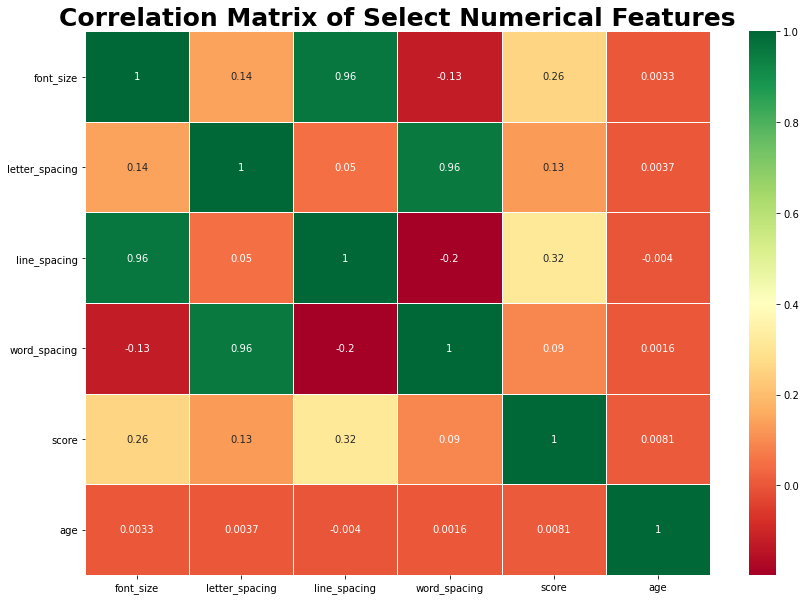

In [25]:
# Calculate the correlation matrix
corr_matrix = df[['font_size', 'letter_spacing', 'line_spacing', 'word_spacing', 'score', 'age']].corr()

# Set up the matplotlib figure
plt.figure(figsize=(14, 10))

# Generate a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', linewidths=.5)

# Show plot with a title
plt.title('Correlation Matrix of Select Numerical Features', fontsize=25, weight='bold')
plt.yticks(rotation=0)
plt.show()

### Explore Test Score Results by Category

In [26]:
df.groupby('wcag_compliant')['score'].mean().sort_values(ascending=False)

wcag_compliant
True     75.859783
False    50.174005
Name: score, dtype: float64

In [27]:
df.groupby('wcag_compliant')['passing_score'].mean().sort_values(ascending=False)

wcag_compliant
True     0.681055
False    0.272325
Name: passing_score, dtype: float64

In [28]:
df.groupby(['disability_id','wcag_compliant'])['score'].mean()

disability_id  wcag_compliant
90000001       False             51.550814
               True              75.040074
90000002       False             48.566827
               True              77.880895
90000003       False             50.776716
               True              74.736089
Name: score, dtype: float64

In [29]:
df.groupby(['disability_id','wcag_compliant'])['passing_score'].mean()

disability_id  wcag_compliant
90000001       False             0.289902
               True              0.661029
90000002       False             0.245192
               True              0.730616
90000003       False             0.286765
               True              0.653418
Name: passing_score, dtype: float64

In [30]:
df.groupby(['disability_id','setting_type'])['score'].mean()

disability_id  setting_type
90000001       90000001A       75.434091
               90000001B       67.911635
               90000001C       79.812968
               90000001D       76.416035
               90000001E       51.550814
90000002       90000002A       76.964339
               90000002B       80.632941
               90000002C       75.993647
               90000002D       48.566827
90000003       90000003A       76.668322
               90000003B       77.623310
               90000003C       69.672167
               90000003D       50.776716
Name: score, dtype: float64

In [31]:
df.groupby(['disability_id','setting_type'])['passing_score'].mean()

disability_id  setting_type
90000001       90000001A       0.659091
               90000001B       0.512579
               90000001C       0.763689
               90000001D       0.696793
               90000001E       0.289902
90000002       90000002A       0.725686
               90000002B       0.792941
               90000002C       0.672941
               90000002D       0.245192
90000003       90000003A       0.683215
               90000003B       0.731935
               90000003C       0.539409
               90000003D       0.286765
Name: passing_score, dtype: float64

In [32]:
groupby_result = df.groupby(['disability_id', 'wcag_compliant'])['score'].mean().reset_index()
groupby_result

,disability_id,wcag_compliant,score
0,90000001,False,51.550814
1,90000001,True,75.040074
2,90000002,False,48.566827
3,90000002,True,77.880895
4,90000003,False,50.776716
5,90000003,True,74.736089


In [33]:
# Calculate the increase in score for each disability_id
score_increase = groupby_result.groupby('disability_id')['score'].diff()

# Create a new DataFrame with 'disability_id' and 'score_increase'
score_increase_df = pd.DataFrame({'disability_id': groupby_result['disability_id'], 'score_increase': score_increase})

# Drop rows with NaN values
score_increase_df.dropna(inplace=True)

# Set 'disability_id' as the index
score_increase_df.set_index('disability_id', inplace=True)

score_increase_df

,score_increase
disability_id,
90000001,23.489259
90000002,29.314068
90000003,23.959373


In [34]:
# Function to reorder a seaborn palette by value
def colors_from_values(values: pd.Series, palette_name:str, ascending=True):
    '''Returns a seaborn palette reordered by value
    Parameters:
    values: pd.Series
    palette_name:str, Seaborn valid palette name
    ascending: bool, optional color sort order
    '''
    # convert to indices
    values = values.sort_values(ascending=ascending).reset_index()
    indices = values.sort_values(by=values.columns[0]).index
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)

### Visualizations of Test Score Results by Category

<ipython-input-35-4c5523aaf6a1>:167: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3[0, 0].set_xticklabels(ax3[0, 0].get_xticklabels(), rotation=90)
<ipython-input-35-4c5523aaf6a1>:175: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3[0, 1].set_xticklabels(ax3[0, 1].get_xticklabels(), rotation=90)


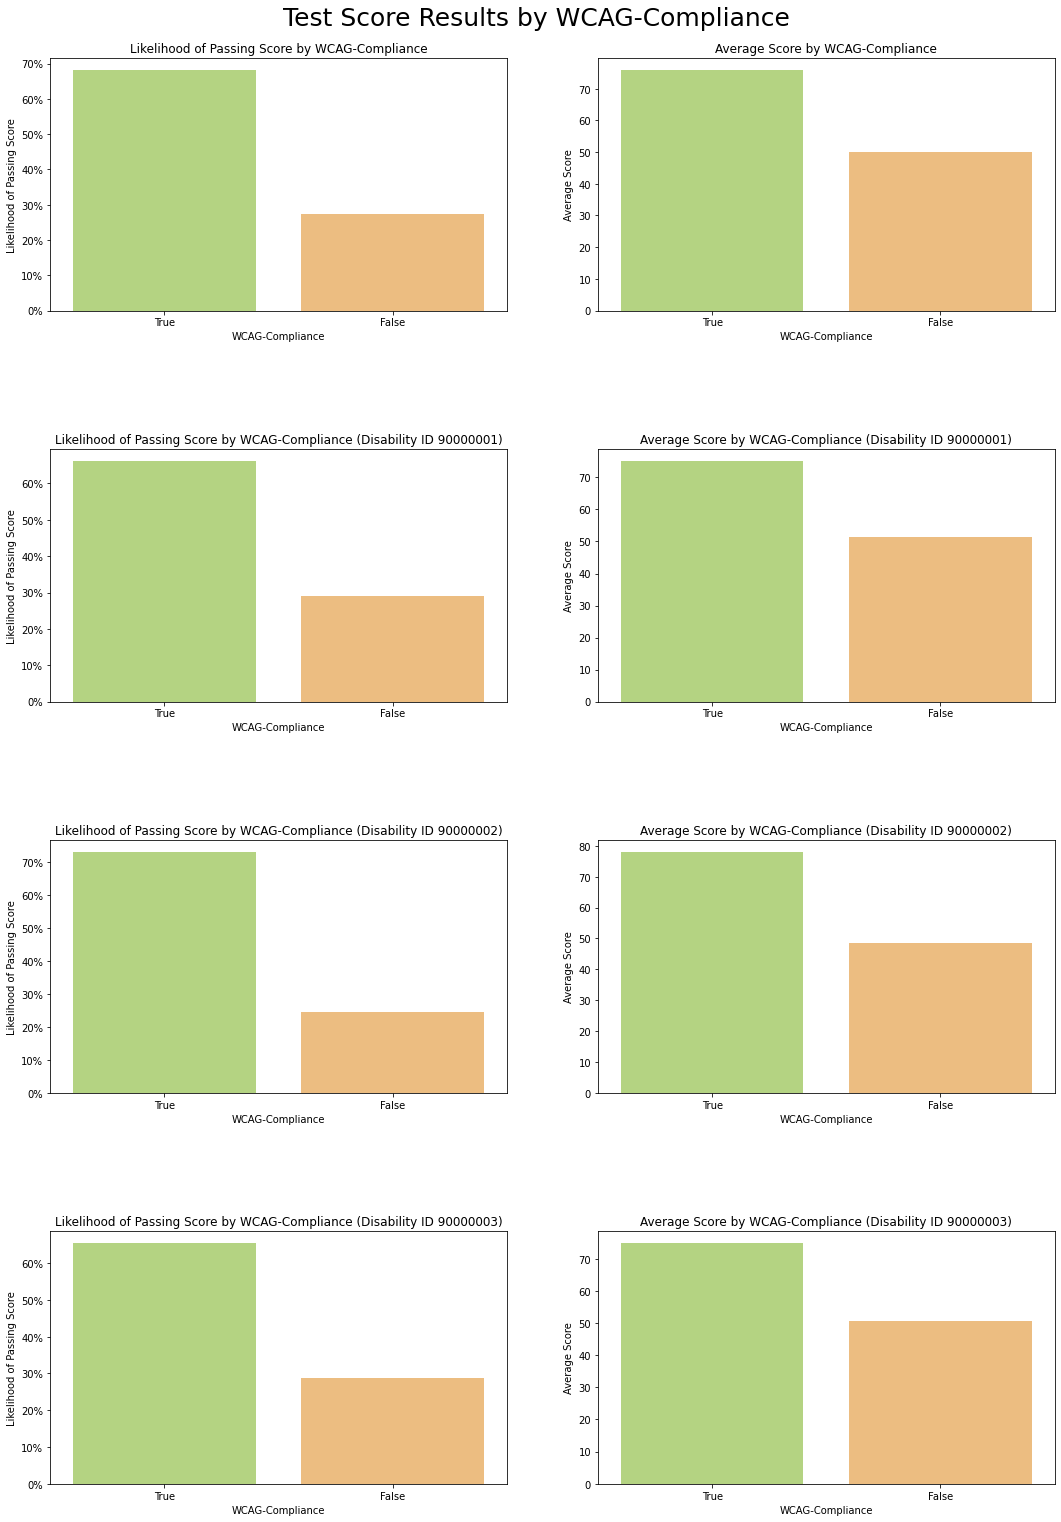

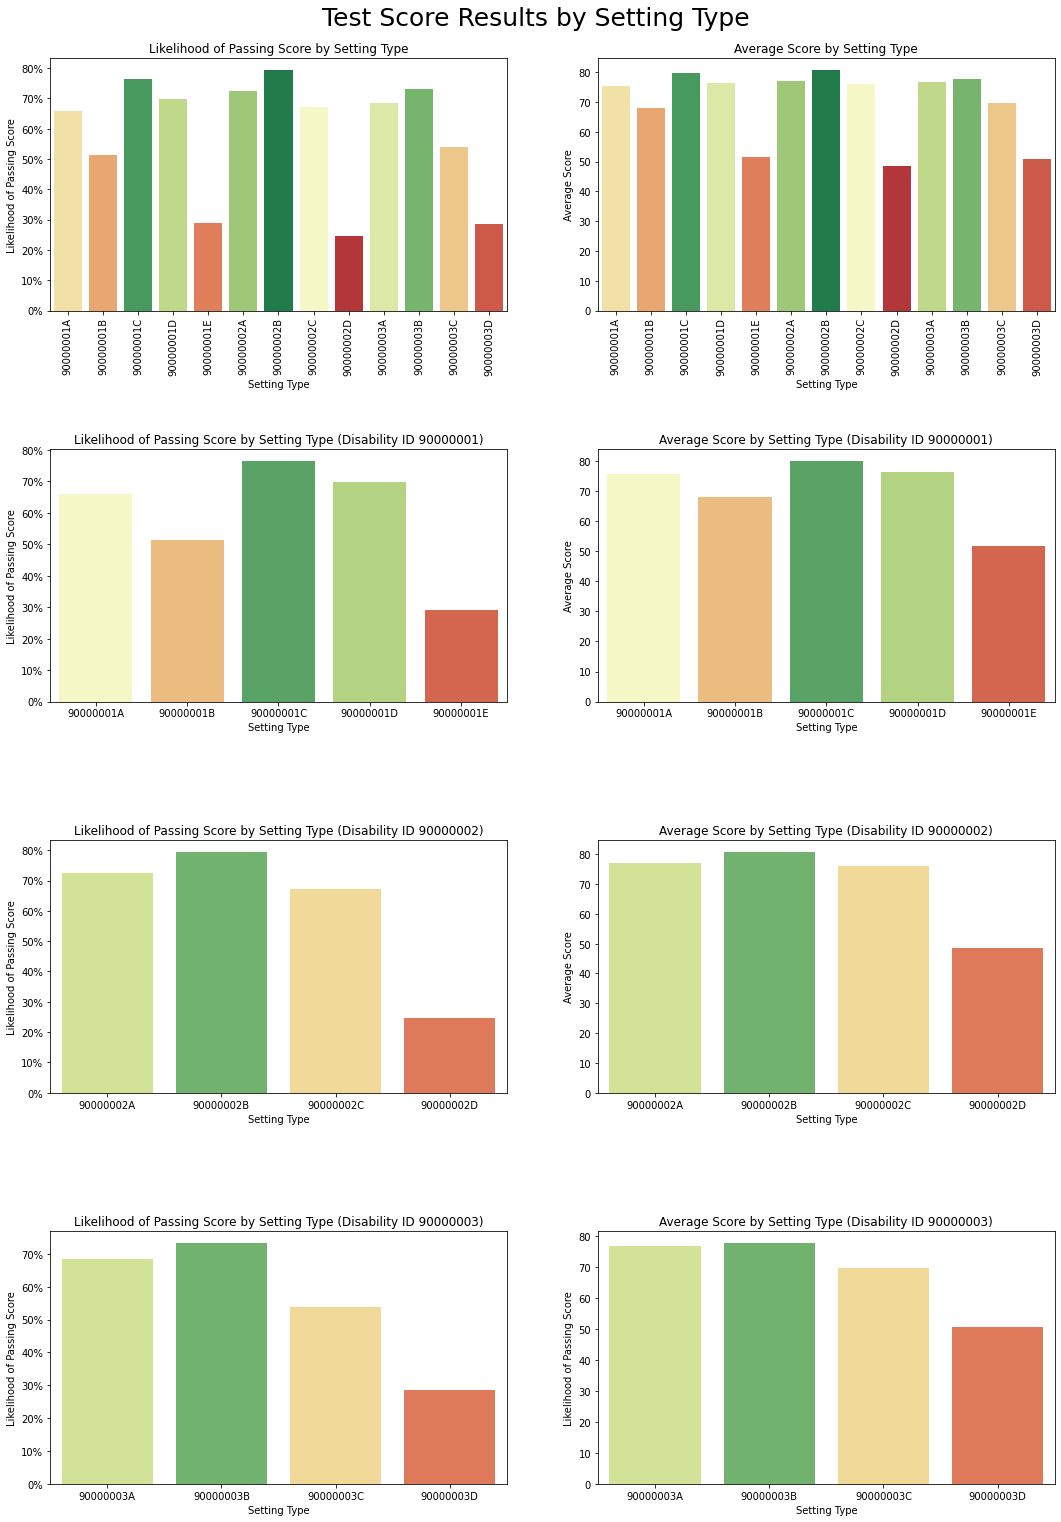

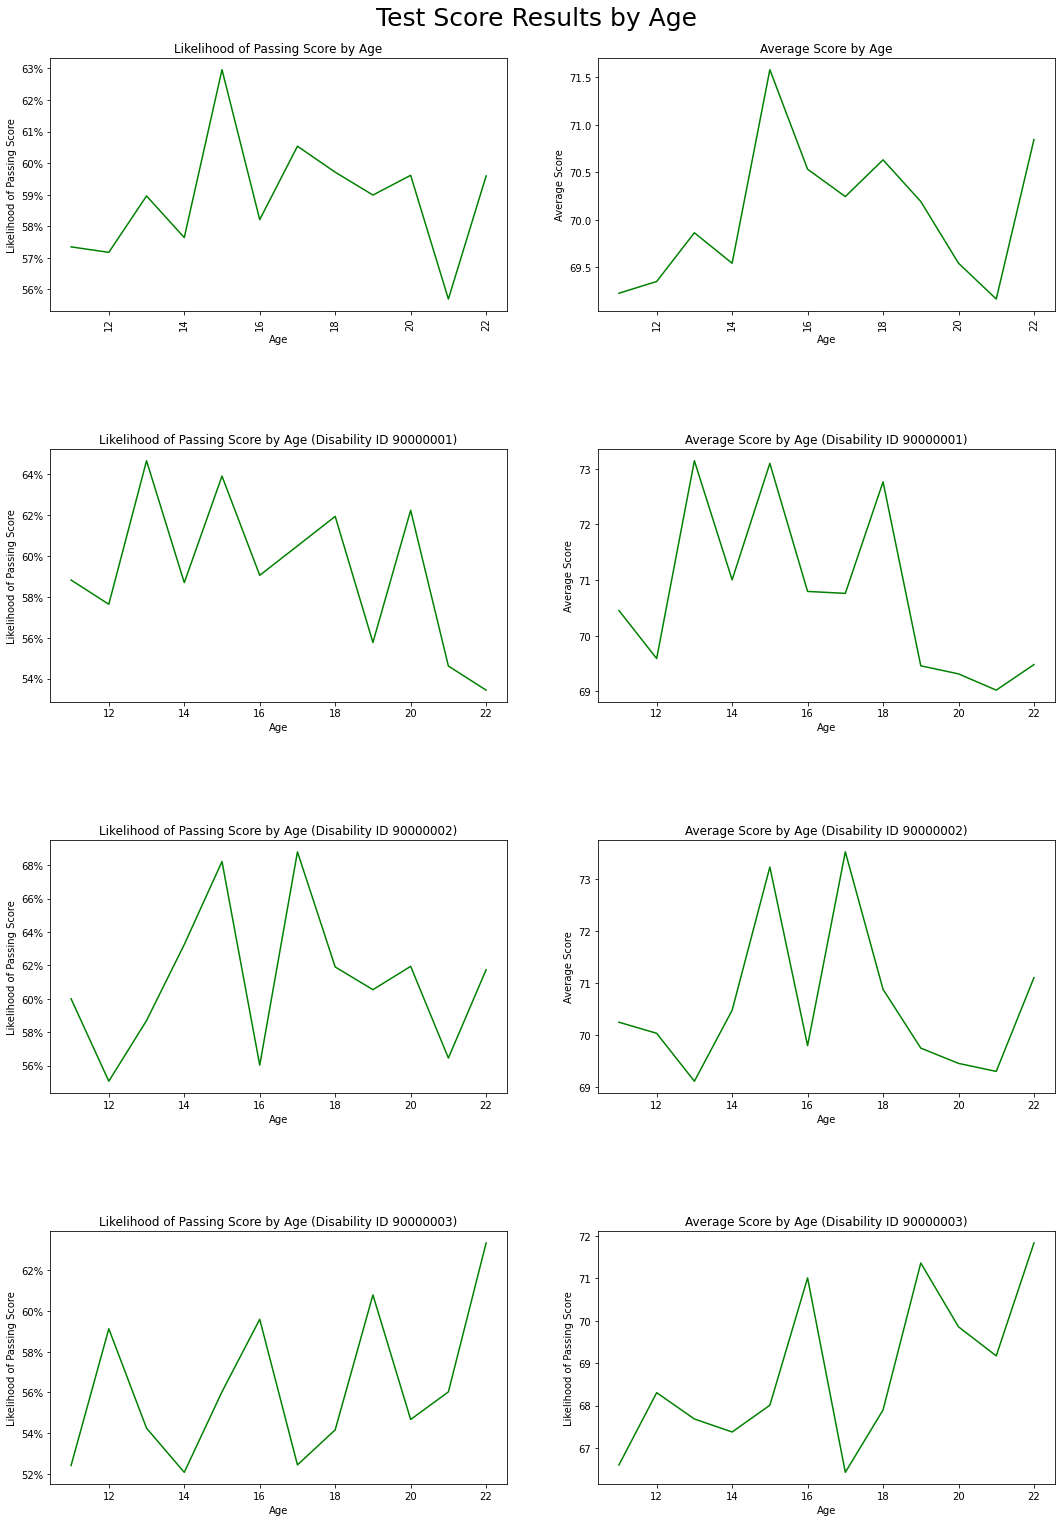

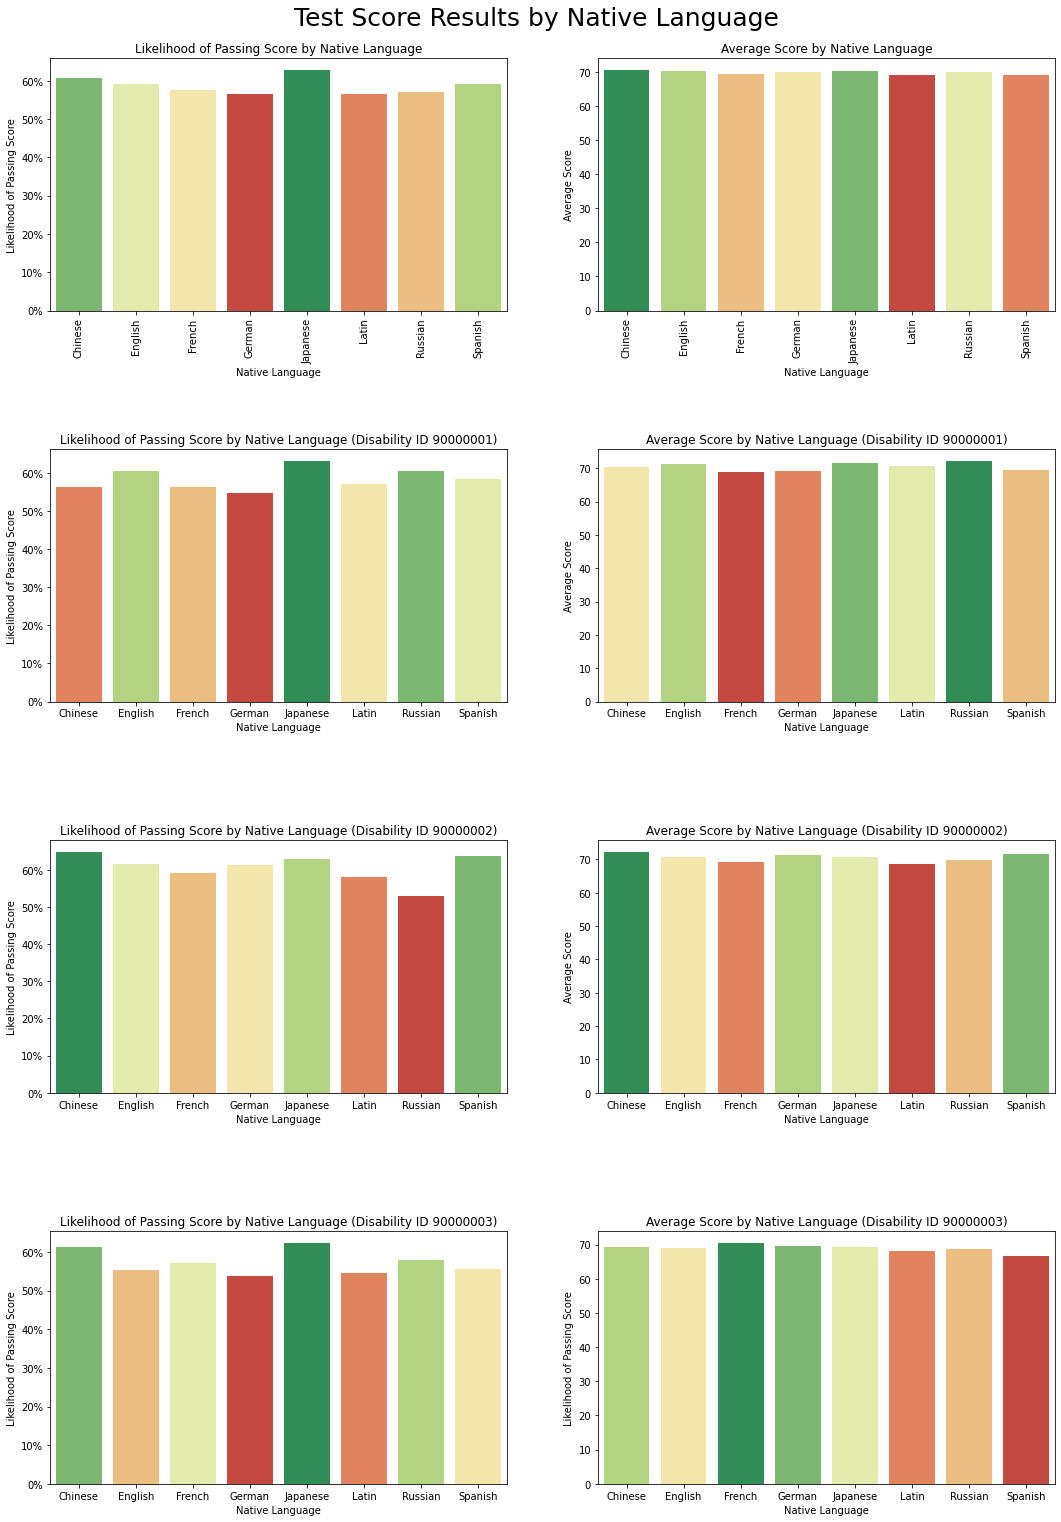

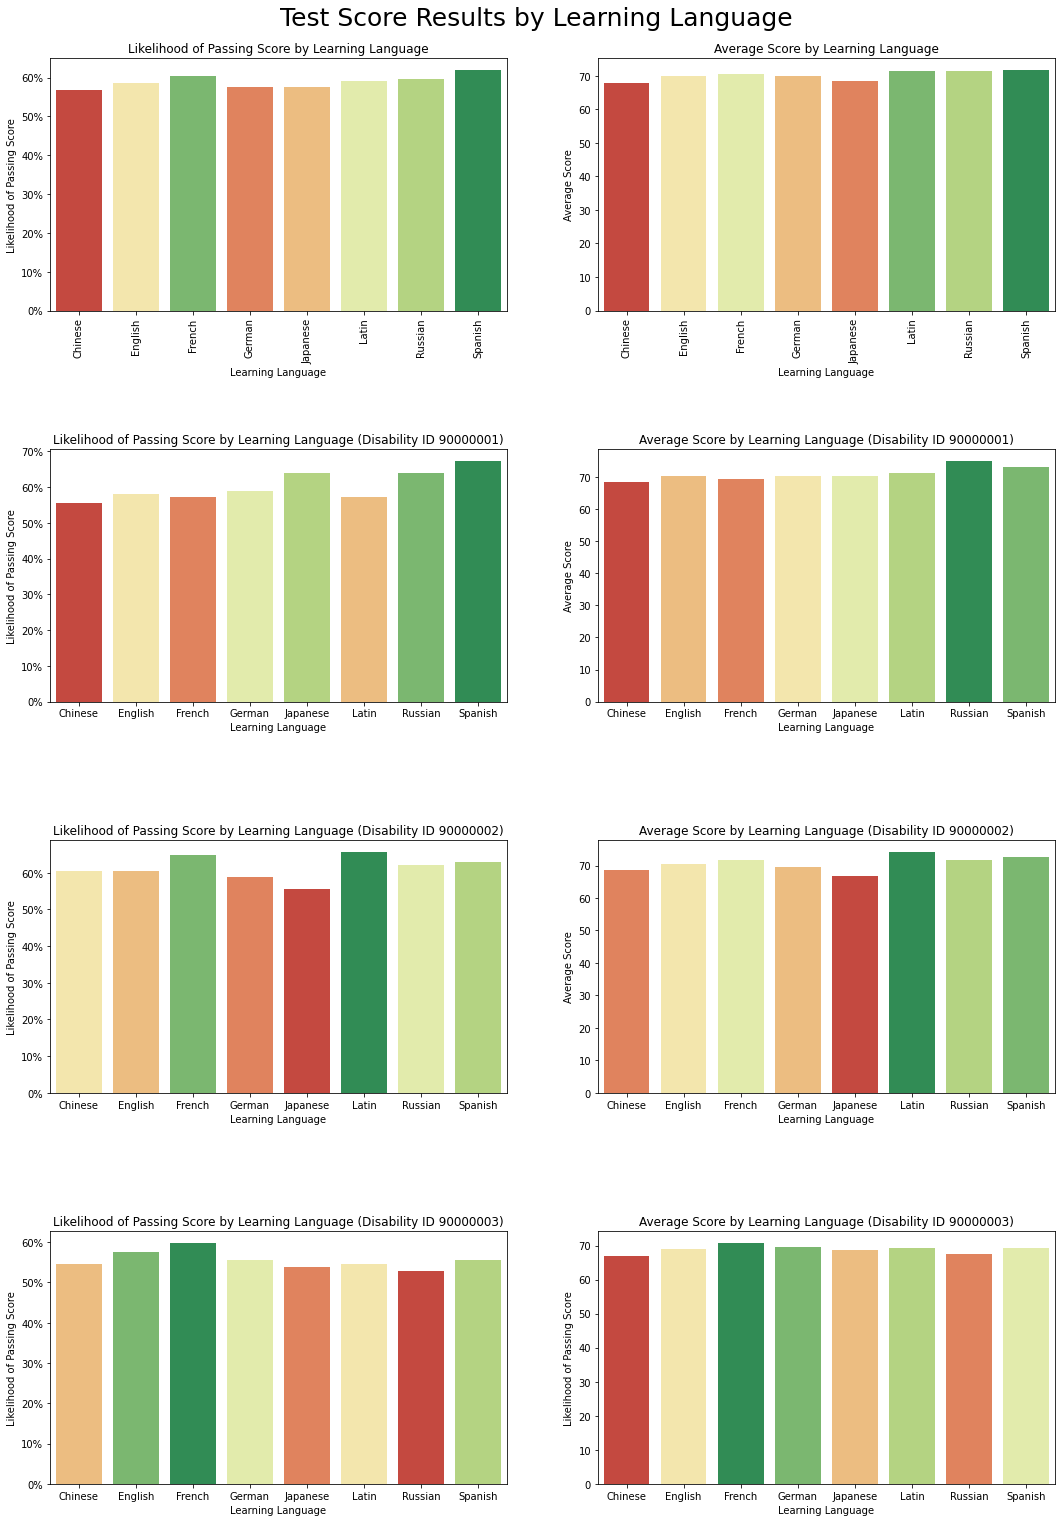

In [35]:
# Visualize test score results for various categories overall and for each disability ID


# Create separate dataframes stratified by disability ID
disability_90000001_df = df[df['disability_id'] == 90000001]
disability_90000002_df = df[df['disability_id'] == 90000002]
disability_90000003_df = df[df['disability_id'] == 90000003]


# Test Score Results by WCAG-Compliance

# WCAG-compliant settings result in a higher likelihood of a passing test score than non-WCAG-compliant settings

# WCAG-compliant settings allow for higher average test scores than non-WCAG-compliant settings

f1, ax1 = plt.subplots(4, 2, figsize =(18, 24))
f1.suptitle('Test Score Results by WCAG-Compliance', fontsize=25)
f1.subplots_adjust(top=0.95, hspace=0.55)

wcag_passing_df = df.groupby('wcag_compliant')['passing_score'].mean()
sorted_wcag_passing = wcag_passing_df.sort_values(ascending=False).index
sns.barplot(x='wcag_compliant', y='passing_score', data=df, order=sorted_wcag_passing,  ci=None, palette='RdYlGn_r', ax = ax1[0, 0])
ax1[0, 0].set_title('Likelihood of Passing Score by WCAG-Compliance')
ax1[0, 0].set_xlabel('WCAG-Compliance')
ax1[0, 0].set_ylabel('Likelihood of Passing Score')
ax1[0, 0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

wcag_avg_score_df = df.groupby('wcag_compliant')['score'].mean()
sorted_wcag_avg_score = wcag_avg_score_df.sort_values(ascending=False).index
sns.barplot(x='wcag_compliant', y='score', data=df, order=sorted_wcag_avg_score,  ci=None, palette='RdYlGn_r', ax = ax1[0, 1])
ax1[0, 1].set_title('Average Score by WCAG-Compliance')
ax1[0, 1].set_xlabel('WCAG-Compliance')
ax1[0, 1].set_ylabel('Average Score')

wcag_passing_90000001_df = disability_90000001_df.groupby('wcag_compliant')['passing_score'].mean()
sorted_wcag_passing_90000001 = wcag_passing_90000001_df.sort_values(ascending=False).index
sns.barplot(x='wcag_compliant', y='passing_score', data=disability_90000001_df, order=sorted_wcag_passing_90000001,  ci=None, palette='RdYlGn_r', ax = ax1[1, 0])
ax1[1, 0].set_title('Likelihood of Passing Score by WCAG-Compliance (Disability ID 90000001)')
ax1[1, 0].set_xlabel('WCAG-Compliance')
ax1[1, 0].set_ylabel('Likelihood of Passing Score')
ax1[1, 0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

wcag_avg_score_90000001_df = disability_90000001_df.groupby('wcag_compliant')['score'].mean()
sorted_wcag_avg_score_90000001 = wcag_avg_score_90000001_df.sort_values(ascending=False).index
sns.barplot(x='wcag_compliant', y='score', data=disability_90000001_df, order=sorted_wcag_avg_score_90000001,  ci=None, palette='RdYlGn_r', ax = ax1[1, 1])
ax1[1, 1].set_title('Average Score by WCAG-Compliance (Disability ID 90000001)')
ax1[1, 1].set_xlabel('WCAG-Compliance')
ax1[1, 1].set_ylabel('Average Score')

wcag_passing_90000002_df = disability_90000002_df.groupby('wcag_compliant')['passing_score'].mean()
sorted_wcag_passing_90000002 = wcag_passing_90000002_df.sort_values(ascending=False).index
sns.barplot(x='wcag_compliant', y='passing_score', data=disability_90000002_df, order=sorted_wcag_passing_90000002,  ci=None, palette='RdYlGn_r', ax = ax1[2, 0])
ax1[2, 0].set_title('Likelihood of Passing Score by WCAG-Compliance (Disability ID 90000002)')
ax1[2, 0].set_xlabel('WCAG-Compliance')
ax1[2, 0].set_ylabel('Likelihood of Passing Score')
ax1[2, 0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

wcag_avg_score_90000002_df = disability_90000002_df.groupby('wcag_compliant')['score'].mean()
sorted_wcag_avg_score_90000002 = wcag_avg_score_90000002_df.sort_values(ascending=False).index
sns.barplot(x='wcag_compliant', y='score', data=disability_90000002_df, order=sorted_wcag_avg_score_90000002,  ci=None, palette='RdYlGn_r', ax = ax1[2, 1])
ax1[2, 1].set_title('Average Score by WCAG-Compliance (Disability ID 90000002)')
ax1[2, 1].set_xlabel('WCAG-Compliance')
ax1[2, 1].set_ylabel('Average Score')

wcag_passing_90000003_df = disability_90000003_df.groupby('wcag_compliant')['passing_score'].mean()
sorted_wcag_passing_90000003 = wcag_passing_90000003_df.sort_values(ascending=False).index
sns.barplot(x='wcag_compliant', y='passing_score', data=disability_90000003_df, order=sorted_wcag_passing_90000003,  ci=None, palette='RdYlGn_r', ax = ax1[3, 0])
ax1[3, 0].set_title('Likelihood of Passing Score by WCAG-Compliance (Disability ID 90000003)')
ax1[3, 0].set_xlabel('WCAG-Compliance')
ax1[3, 0].set_ylabel('Likelihood of Passing Score')
ax1[3, 0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

wcag_avg_score_90000003_df = disability_90000003_df.groupby('wcag_compliant')['score'].mean()
sorted_wcag_avg_score_90000003 = wcag_avg_score_90000003_df.sort_values(ascending=False).index
sns.barplot(x='wcag_compliant', y='score', data=disability_90000003_df, order=sorted_wcag_avg_score_90000003,  ci=None, palette='RdYlGn_r', ax = ax1[3, 1])
ax1[3, 1].set_title('Average Score by WCAG-Compliance (Disability ID 90000003)')
ax1[3, 1].set_xlabel('WCAG-Compliance')
ax1[3, 1].set_ylabel('Average Score')


# Test Score Results by Setting Type

# WCAG-compliant settings result in a higher likelihood of a passing test score than non-WCAG-compliant settings

# WCAG-compliant settings allow for higher average test scores than non-WCAG-compliant settings

f2, ax2 = plt.subplots(4, 2, figsize =(18, 24))
f2.suptitle('Test Score Results by Setting Type', fontsize=25)
f2.subplots_adjust(top=0.95, hspace=0.55)

setting_passing_df = df.groupby('setting_type')['passing_score'].mean()
order_settings_passing = setting_passing_df.index.sort_values()
sns.barplot(x = setting_passing_df.index, y = setting_passing_df, ci=None, palette=colors_from_values(setting_passing_df, "RdYlGn"), order=order_settings_passing, ax = ax2[0, 0])
ax2[0, 0].set_title('Likelihood of Passing Score by Setting Type')
ax2[0, 0].set_xlabel('Setting Type')
ax2[0, 0].set_ylabel('Likelihood of Passing Score')
ax2[0, 0].set_xticklabels(ax2[0, 0].get_xticklabels(), rotation=90)
ax2[0, 0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

setting_avg_score_df = df.groupby('setting_type')['score'].mean()
order_settings_avg_score = setting_avg_score_df.index.sort_values()
sns.barplot(x = setting_avg_score_df.index, y = setting_avg_score_df, ci=None, palette=colors_from_values(setting_avg_score_df, "RdYlGn"), order=order_settings_avg_score, ax = ax2[0, 1])
ax2[0, 1].set_title('Average Score by Setting Type')
ax2[0, 1].set_xlabel('Setting Type')
ax2[0, 1].set_ylabel('Average Score')
ax2[0, 1].set_xticklabels(ax2[0, 1].get_xticklabels(), rotation=90)

setting_passing_90000001_df = disability_90000001_df.groupby('setting_type')['passing_score'].mean()
order_settings_passing_90000001 = setting_passing_90000001_df.index.sort_values()
sns.barplot(x = setting_passing_90000001_df.index, y = setting_passing_90000001_df, ci=None, palette=colors_from_values(setting_passing_90000001_df, "RdYlGn"), order=order_settings_passing_90000001, ax = ax2[1, 0])
ax2[1, 0].set_title('Likelihood of Passing Score by Setting Type (Disability ID 90000001)')
ax2[1, 0].set_xlabel('Setting Type')
ax2[1, 0].set_ylabel('Likelihood of Passing Score')
ax2[1, 0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

setting_avg_score_90000001_df = disability_90000001_df.groupby('setting_type')['score'].mean()
order_settings_avg_score_90000001 = setting_avg_score_90000001_df.index.sort_values()
sns.barplot(x = setting_avg_score_90000001_df.index, y = setting_avg_score_90000001_df, ci=None, palette=colors_from_values(setting_avg_score_90000001_df, "RdYlGn"), order=order_settings_avg_score_90000001, ax = ax2[1, 1])
ax2[1, 1].set_title('Average Score by Setting Type (Disability ID 90000001)')
ax2[1, 1].set_xlabel('Setting Type')
ax2[1, 1].set_ylabel('Average Score')

setting_passing_90000002_df = disability_90000002_df.groupby('setting_type')['passing_score'].mean()
order_settings_passing_90000002 = setting_passing_90000002_df.index.sort_values()
sns.barplot(x = setting_passing_90000002_df.index, y = setting_passing_90000002_df, ci=None, palette=colors_from_values(setting_passing_90000002_df, "RdYlGn"), order=order_settings_passing_90000002, ax = ax2[2, 0])
ax2[2, 0].set_title('Likelihood of Passing Score by Setting Type (Disability ID 90000002)')
ax2[2, 0].set_xlabel('Setting Type')
ax2[2, 0].set_ylabel('Likelihood of Passing Score')
ax2[2, 0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

setting_avg_score_90000002_df = disability_90000002_df.groupby('setting_type')['score'].mean()
order_settings_avg_score_90000002 = setting_avg_score_90000002_df.index.sort_values()
sns.barplot(x = setting_avg_score_90000002_df.index, y = setting_avg_score_90000002_df, ci=None, palette=colors_from_values(setting_avg_score_90000002_df, "RdYlGn"), order=order_settings_avg_score_90000002, ax = ax2[2, 1])
ax2[2, 1].set_title('Average Score by Setting Type (Disability ID 90000002)')
ax2[2, 1].set_xlabel('Setting Type')
ax2[2, 1].set_ylabel('Average Score')

setting_passing_90000003_df = disability_90000003_df.groupby('setting_type')['passing_score'].mean()
order_settings_passing_90000003 = setting_passing_90000003_df.index.sort_values()
sns.barplot(x = setting_passing_90000003_df.index, y = setting_passing_90000003_df, ci=None, palette=colors_from_values(setting_passing_90000003_df, "RdYlGn"), order=order_settings_passing_90000003, ax = ax2[3, 0])
ax2[3, 0].set_title('Likelihood of Passing Score by Setting Type (Disability ID 90000003)')
ax2[3, 0].set_xlabel('Setting Type')
ax2[3, 0].set_ylabel('Likelihood of Passing Score')
ax2[3, 0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

setting_avg_score_90000003_df = disability_90000003_df.groupby('setting_type')['score'].mean()
order_settings_avg_score_90000003 = setting_avg_score_90000003_df.index.sort_values()
sns.barplot(x = setting_avg_score_90000003_df.index, y = setting_avg_score_90000003_df, ci=None, palette=colors_from_values(setting_avg_score_90000003_df, "RdYlGn"), order=order_settings_avg_score_90000003, ax = ax2[3, 1])
ax2[3, 1].set_title('Average Score by Setting Type (Disability ID 90000003)')
ax2[3, 1].set_xlabel('Setting Type')
ax2[3, 1].set_ylabel('Likelihood of Passing Score')


# Test Score Results by Age

# No clear patterns are evident by age

f3, ax3 = plt.subplots(4, 2, figsize =(18, 24))
f3.suptitle('Test Score Results by Age', fontsize=25)
f3.subplots_adjust(top=0.95, hspace=0.55)

age_passing_df = df.groupby('age')['passing_score'].mean()
sns.lineplot(x = age_passing_df.index, y = age_passing_df, color = "green", ax = ax3[0, 0])
ax3[0, 0].set_title('Likelihood of Passing Score by Age')
ax3[0, 0].set_xlabel('Age')
ax3[0, 0].set_ylabel('Likelihood of Passing Score')
ax3[0, 0].set_xticklabels(ax3[0, 0].get_xticklabels(), rotation=90)
ax3[0, 0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

age_avg_score_df = df.groupby('age')['score'].mean()
sns.lineplot(x = age_avg_score_df.index, y = age_avg_score_df, color = "green", ax = ax3[0, 1])
ax3[0, 1].set_title('Average Score by Age')
ax3[0, 1].set_xlabel('Age')
ax3[0, 1].set_ylabel('Average Score')
ax3[0, 1].set_xticklabels(ax3[0, 1].get_xticklabels(), rotation=90)

age_passing_90000001_df = disability_90000001_df.groupby('age')['passing_score'].mean()
sns.lineplot(x = age_passing_90000001_df.index, y = age_passing_90000001_df, color = "green", ax = ax3[1, 0])
ax3[1, 0].set_title('Likelihood of Passing Score by Age (Disability ID 90000001)')
ax3[1, 0].set_xlabel('Age')
ax3[1, 0].set_ylabel('Likelihood of Passing Score')
ax3[1, 0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

age_avg_score_90000001_df = disability_90000001_df.groupby('age')['score'].mean()
sns.lineplot(x = age_avg_score_90000001_df.index, y = age_avg_score_90000001_df, color = "green", ax = ax3[1, 1])
ax3[1, 1].set_title('Average Score by Age (Disability ID 90000001)')
ax3[1, 1].set_xlabel('Age')
ax3[1, 1].set_ylabel('Average Score')

age_passing_90000002_df = disability_90000002_df.groupby('age')['passing_score'].mean()
sns.lineplot(x = age_passing_90000002_df.index, y = age_passing_90000002_df, color = "green", ax = ax3[2, 0])
ax3[2, 0].set_title('Likelihood of Passing Score by Age (Disability ID 90000002)')
ax3[2, 0].set_xlabel('Age')
ax3[2, 0].set_ylabel('Likelihood of Passing Score')
ax3[2, 0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

age_avg_score_90000002_df = disability_90000002_df.groupby('age')['score'].mean()
sns.lineplot(x = age_avg_score_90000002_df.index, y = age_avg_score_90000002_df, color = "green", ax = ax3[2, 1])
ax3[2, 1].set_title('Average Score by Age (Disability ID 90000002)')
ax3[2, 1].set_xlabel('Age')
ax3[2, 1].set_ylabel('Average Score')

age_passing_90000003_df = disability_90000003_df.groupby('age')['passing_score'].mean()
sns.lineplot(x = age_passing_90000003_df.index, y = age_passing_90000003_df, color = "green", ax = ax3[3, 0])
ax3[3, 0].set_title('Likelihood of Passing Score by Age (Disability ID 90000003)')
ax3[3, 0].set_xlabel('Age')
ax3[3, 0].set_ylabel('Likelihood of Passing Score')
ax3[3, 0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

age_avg_score_90000003_df = disability_90000003_df.groupby('age')['score'].mean()
sns.lineplot(x = age_avg_score_90000003_df.index, y = age_avg_score_90000003_df, color = "green", ax = ax3[3, 1])
ax3[3, 1].set_title('Average Score by Age (Disability ID 90000003)')
ax3[3, 1].set_xlabel('Age')
ax3[3, 1].set_ylabel('Likelihood of Passing Score')


# Test Score Results by Native Language

# No clear patterns are evident by native language

f4, ax4 = plt.subplots(4, 2, figsize =(18, 24))
f4.suptitle('Test Score Results by Native Language', fontsize=25)
f4.subplots_adjust(top=0.95, hspace=0.55)

native_language_passing_df = df.groupby('native_language')['passing_score'].mean()
order_native_language_passing = native_language_passing_df.index.sort_values()
sns.barplot(x = native_language_passing_df.index, y = native_language_passing_df, ci=None, palette=colors_from_values(native_language_passing_df, "RdYlGn"), order=order_native_language_passing, ax = ax4[0, 0])
ax4[0, 0].set_title('Likelihood of Passing Score by Native Language')
ax4[0, 0].set_xlabel('Native Language')
ax4[0, 0].set_ylabel('Likelihood of Passing Score')
ax4[0, 0].set_xticklabels(ax4[0, 0].get_xticklabels(), rotation=90)
ax4[0, 0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

native_language_avg_score_df = df.groupby('native_language')['score'].mean()
order_native_language_avg_score = native_language_avg_score_df.index.sort_values()
sns.barplot(x = native_language_avg_score_df.index, y = native_language_avg_score_df, ci=None, palette=colors_from_values(native_language_avg_score_df, "RdYlGn"), order=order_native_language_avg_score, ax = ax4[0, 1])
ax4[0, 1].set_title('Average Score by Native Language')
ax4[0, 1].set_xlabel('Native Language')
ax4[0, 1].set_ylabel('Average Score')
ax4[0, 1].set_xticklabels(ax4[0, 1].get_xticklabels(), rotation=90)

native_language_passing_90000001_df = disability_90000001_df.groupby('native_language')['passing_score'].mean()
order_native_language_passing_90000001 = native_language_passing_90000001_df.index.sort_values()
sns.barplot(x = native_language_passing_90000001_df.index, y = native_language_passing_90000001_df, ci=None, palette=colors_from_values(native_language_passing_90000001_df, "RdYlGn"), order=order_native_language_passing_90000001, ax = ax4[1, 0])
ax4[1, 0].set_title('Likelihood of Passing Score by Native Language (Disability ID 90000001)')
ax4[1, 0].set_xlabel('Native Language')
ax4[1, 0].set_ylabel('Likelihood of Passing Score')
ax4[1, 0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

native_language_avg_score_90000001_df = disability_90000001_df.groupby('native_language')['score'].mean()
order_native_language_avg_score_90000001 = native_language_avg_score_90000001_df.index.sort_values()
sns.barplot(x = native_language_avg_score_90000001_df.index, y = native_language_avg_score_90000001_df, ci=None, palette=colors_from_values(native_language_avg_score_90000001_df, "RdYlGn"), order=order_native_language_avg_score_90000001, ax = ax4[1, 1])
ax4[1, 1].set_title('Average Score by Native Language (Disability ID 90000001)')
ax4[1, 1].set_xlabel('Native Language')
ax4[1, 1].set_ylabel('Average Score')

native_language_passing_90000002_df = disability_90000002_df.groupby('native_language')['passing_score'].mean()
order_native_language_passing_90000002 = native_language_passing_90000002_df.index.sort_values()
sns.barplot(x = native_language_passing_90000002_df.index, y = native_language_passing_90000002_df, ci=None, palette=colors_from_values(native_language_passing_90000002_df, "RdYlGn"), order=order_native_language_passing_90000002, ax = ax4[2, 0])
ax4[2, 0].set_title('Likelihood of Passing Score by Native Language (Disability ID 90000002)')
ax4[2, 0].set_xlabel('Native Language')
ax4[2, 0].set_ylabel('Likelihood of Passing Score')
ax4[2, 0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

native_language_avg_score_90000002_df = disability_90000002_df.groupby('native_language')['score'].mean()
order_native_language_avg_score_90000002 = native_language_avg_score_90000002_df.index.sort_values()
sns.barplot(x = native_language_avg_score_90000002_df.index, y = native_language_avg_score_90000002_df, ci=None, palette=colors_from_values(native_language_avg_score_90000002_df, "RdYlGn"), order=order_native_language_avg_score_90000002, ax = ax4[2, 1])
ax4[2, 1].set_title('Average Score by Native Language (Disability ID 90000002)')
ax4[2, 1].set_xlabel('Native Language')
ax4[2, 1].set_ylabel('Average Score')

native_language_passing_90000003_df = disability_90000003_df.groupby('native_language')['passing_score'].mean()
order_native_language_passing_90000003 = native_language_passing_90000003_df.index.sort_values()
sns.barplot(x = native_language_passing_90000003_df.index, y = native_language_passing_90000003_df, ci=None, palette=colors_from_values(native_language_passing_90000003_df, "RdYlGn"), order=order_native_language_passing_90000003, ax = ax4[3, 0])
ax4[3, 0].set_title('Likelihood of Passing Score by Native Language (Disability ID 90000003)')
ax4[3, 0].set_xlabel('Native Language')
ax4[3, 0].set_ylabel('Likelihood of Passing Score')
ax4[3, 0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

native_language_avg_score_90000003_df = disability_90000003_df.groupby('native_language')['score'].mean()
order_native_language_avg_score_90000003 = native_language_avg_score_90000003_df.index.sort_values()
sns.barplot(x = native_language_avg_score_90000003_df.index, y = native_language_avg_score_90000003_df, ci=None, palette=colors_from_values(native_language_avg_score_90000003_df, "RdYlGn"), order=order_native_language_avg_score_90000003, ax = ax4[3, 1])
ax4[3, 1].set_title('Average Score by Native Language (Disability ID 90000003)')
ax4[3, 1].set_xlabel('Native Language')
ax4[3, 1].set_ylabel('Likelihood of Passing Score')


# Test Score Results by Learning Language

# No clear patterns are evident by learning language

f5, ax5 = plt.subplots(4, 2, figsize =(18, 24))
f5.suptitle('Test Score Results by Learning Language', fontsize=25)
f5.subplots_adjust(top=0.95, hspace=0.55)

learning_language_passing_df = df.groupby('learning_language')['passing_score'].mean()
order_learning_language_passing = learning_language_passing_df.index.sort_values()
sns.barplot(x = learning_language_passing_df.index, y = learning_language_passing_df, ci=None, palette=colors_from_values(learning_language_passing_df, "RdYlGn"), order=order_learning_language_passing, ax = ax5[0, 0])
ax5[0, 0].set_title('Likelihood of Passing Score by Learning Language')
ax5[0, 0].set_xlabel('Learning Language')
ax5[0, 0].set_ylabel('Likelihood of Passing Score')
ax5[0, 0].set_xticklabels(ax5[0, 0].get_xticklabels(), rotation=90)
ax5[0, 0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

learning_language_avg_score_df = df.groupby('learning_language')['score'].mean()
order_learning_language_avg_score = learning_language_avg_score_df.index.sort_values()
sns.barplot(x = learning_language_avg_score_df.index, y = learning_language_avg_score_df, ci=None, palette=colors_from_values(learning_language_avg_score_df, "RdYlGn"), order=order_learning_language_avg_score, ax = ax5[0, 1])
ax5[0, 1].set_title('Average Score by Learning Language')
ax5[0, 1].set_xlabel('Learning Language')
ax5[0, 1].set_ylabel('Average Score')
ax5[0, 1].set_xticklabels(ax5[0, 1].get_xticklabels(), rotation=90)

learning_language_passing_90000001_df = disability_90000001_df.groupby('learning_language')['passing_score'].mean()
order_learning_language_passing_90000001 = learning_language_passing_90000001_df.index.sort_values()
sns.barplot(x = learning_language_passing_90000001_df.index, y = learning_language_passing_90000001_df, ci=None, palette=colors_from_values(learning_language_passing_90000001_df, "RdYlGn"), order=order_learning_language_passing_90000001, ax = ax5[1, 0])
ax5[1, 0].set_title('Likelihood of Passing Score by Learning Language (Disability ID 90000001)')
ax5[1, 0].set_xlabel('Learning Language')
ax5[1, 0].set_ylabel('Likelihood of Passing Score')
ax5[1, 0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

learning_language_avg_score_90000001_df = disability_90000001_df.groupby('learning_language')['score'].mean()
order_learning_language_avg_score_90000001 = learning_language_avg_score_90000001_df.index.sort_values()
sns.barplot(x = learning_language_avg_score_90000001_df.index, y = learning_language_avg_score_90000001_df, ci=None, palette=colors_from_values(learning_language_avg_score_90000001_df, "RdYlGn"), order=order_learning_language_avg_score_90000001, ax = ax5[1, 1])
ax5[1, 1].set_title('Average Score by Learning Language (Disability ID 90000001)')
ax5[1, 1].set_xlabel('Learning Language')
ax5[1, 1].set_ylabel('Average Score')

learning_language_passing_90000002_df = disability_90000002_df.groupby('learning_language')['passing_score'].mean()
order_learning_language_passing_90000002 = learning_language_passing_90000002_df.index.sort_values()
sns.barplot(x = learning_language_passing_90000002_df.index, y = learning_language_passing_90000002_df, ci=None, palette=colors_from_values(learning_language_passing_90000002_df, "RdYlGn"), order=order_learning_language_passing_90000002, ax = ax5[2, 0])
ax5[2, 0].set_title('Likelihood of Passing Score by Learning Language (Disability ID 90000002)')
ax5[2, 0].set_xlabel('Learning Language')
ax5[2, 0].set_ylabel('Likelihood of Passing Score')
ax5[2, 0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

learning_language_avg_score_90000002_df = disability_90000002_df.groupby('learning_language')['score'].mean()
order_learning_language_avg_score_90000002 = learning_language_avg_score_90000002_df.index.sort_values()
sns.barplot(x = learning_language_avg_score_90000002_df.index, y = learning_language_avg_score_90000002_df, ci=None, palette=colors_from_values(learning_language_avg_score_90000002_df, "RdYlGn"), order=order_learning_language_avg_score_90000002, ax = ax5[2, 1])
ax5[2, 1].set_title('Average Score by Learning Language (Disability ID 90000002)')
ax5[2, 1].set_xlabel('Learning Language')
ax5[2, 1].set_ylabel('Average Score')

learning_language_passing_90000003_df = disability_90000003_df.groupby('learning_language')['passing_score'].mean()
order_learning_language_passing_90000003 = learning_language_passing_90000003_df.index.sort_values()
sns.barplot(x = learning_language_passing_90000003_df.index, y = learning_language_passing_90000003_df, ci=None, palette=colors_from_values(learning_language_passing_90000003_df, "RdYlGn"), order=order_learning_language_passing_90000003, ax = ax5[3, 0])
ax5[3, 0].set_title('Likelihood of Passing Score by Learning Language (Disability ID 90000003)')
ax5[3, 0].set_xlabel('Learning Language')
ax5[3, 0].set_ylabel('Likelihood of Passing Score')
ax5[3, 0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

learning_language_avg_score_90000003_df = disability_90000003_df.groupby('learning_language')['score'].mean()
order_learning_language_avg_score_90000003 = learning_language_avg_score_90000003_df.index.sort_values()
sns.barplot(x = learning_language_avg_score_90000003_df.index, y = learning_language_avg_score_90000003_df, ci=None, palette=colors_from_values(learning_language_avg_score_90000003_df, "RdYlGn"), order=order_learning_language_avg_score_90000003, ax = ax5[3, 1])
ax5[3, 1].set_title('Average Score by Learning Language (Disability ID 90000003)')
ax5[3, 1].set_xlabel('Learning Language')
ax5[3, 1].set_ylabel('Likelihood of Passing Score')


# Show the plots
plt.show()

After reviewing visuals, it is apparent that the highest predictor of both a passing test score and higher average test scores is WCAG-compliance, specifically:

- WCAG-compliant settings result in a higher likelihood of a passing test score than non-WCAG-compliant settings

- WCAG-compliant settings allow for higher average test scores than non-WCAG-compliant settings

I found no clear patterns where age, the native language or the learning language affect either the likelihood of a passing test score or the average test score.

### More Data Preparation

#### Drop columns not needed for modeling

In [36]:
df.drop(['user_id', 'first_name', 'last_name', 'username', 'date_of_birth', 'created_at','setting_id', 'profile_photo'], axis = 1, inplace = True)

In [37]:
# df.info()

#### Check for multicollinearity and drop columns as needed

In [38]:
df_nums = df.select_dtypes('number').drop(columns=['disability_id'])
df_nums.corr()

,font_size,letter_spacing,line_spacing,word_spacing,score,age
font_size,1.000000,0.144030,0.958489,-0.125540,0.256910,0.003307
letter_spacing,0.144030,1.000000,0.050311,0.956587,0.127174,0.003715
line_spacing,0.958489,0.050311,1.000000,-0.197261,0.315428,-0.003968
word_spacing,-0.125540,0.956587,-0.197261,1.000000,0.090274,0.001564
score,0.256910,0.127174,0.315428,0.090274,1.000000,0.008126
age,0.003307,0.003715,-0.003968,0.001564,0.008126,1.000000


In [39]:
df.drop(['line_spacing', 'letter_spacing'], axis = 1, inplace = True)

Font size and line spacing are highly correlated. That is because the optimal line spacing according to WCAG guidelines is 1.5 times or 150% of the font size. I will keep **font_size** and drop **line_spacing**.

Similarly, word spacing and letter spacing are highly correlated. WCAG guidelines suggest that letter spacing should be 35% more than average letter width (based on font). They also suggest that word spacing should be 3.5 times more than the line spacing. Since I am dropping **line_spacing**, it should be okay to keep **word_spacing**.

## Models

### Define predictor (X) and target (y) variables

In [40]:
X = df.drop(['score', 'passing_score'], axis=1)
y = df['score'].astype(int)
other_y = df['passing_score']

### Split the data between train and test sets

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 777, stratify = y, test_size = 0.3)

### Perform one-hot encoding for categorical columns

In [42]:
# Specify the categorical columns to encode
X_train_cat = X_train.select_dtypes('object')
X_test_cat = X_test.select_dtypes('object')

# Create an instance of the OneHotEncoder
ohe = OneHotEncoder(drop = 'first', sparse_output = False)

# Transform the categorical columns in both the training and testing sets
X_train_dummies = pd.DataFrame(ohe.fit_transform(X_train_cat), columns=ohe.get_feature_names_out(), index=X_train_cat.index)
X_test_dummies = pd.DataFrame(ohe.fit_transform(X_test_cat), columns=ohe.get_feature_names_out(), index=X_test_cat.index)

### Normalize numerical columns by scaling the train and test sets

In [43]:
# Specify the numerical columns to scale
X_train_nums = X_train.select_dtypes('number')
X_test_nums = X_test.select_dtypes('number')

# Create an instance of the StandardScaler
ss = StandardScaler()

# Transform the numerical columns in both the training and testing sets
X_train_scaled = pd.DataFrame(ss.fit_transform(X_train_nums), index = X_train_nums.index)
X_test_scaled = pd.DataFrame(ss.fit_transform(X_test_nums), index = X_test_nums.index)

X_train_scaled.columns = X_train_nums.columns
X_test_scaled.columns = X_test_nums.columns


### Merge the pre-processed categorical and numerical columns

In [44]:
X_train_preprocessed = pd.concat([X_train_scaled, X_train_dummies], axis = 1)
X_test_preprocessed = pd.concat([X_test_scaled, X_test_dummies], axis = 1)

X_train_preprocessed.columns = X_train_preprocessed.columns.astype(str)
X_test_preprocessed.columns = X_test_preprocessed.columns.astype(str)

### MODEL 1: Apply a Dummy Classifier as the Baseline Model

I used a DummyRegressor as a simple baseline model so I can compare its accuracy to more complex regression models that take input features in consideration. It uses simple rules, but is useful as a simple baseline to compare with other (real) regressors.

In [45]:
# Create a baseline model
dummy_model = DummyRegressor(strategy = 'mean')

# Train the model on the preprocessed training data
dummy_model.fit(X_train_preprocessed, y_train)

# Predict on the testing data
y_pred_dummy = dummy_model.predict(X_test_preprocessed)

# Evaluate the model's performance using regression metrics
mse_dummy = mean_squared_error(y_test, y_pred_dummy)
mae_dummy = mean_absolute_error(y_test, y_pred_dummy)

print(f'Mean Squared Error: {mse_dummy}')
print(f'Mean Absolute Error: {mae_dummy}')

Mean Squared Error: 487.2628336054422
Mean Absolute Error: 17.46879238095238


### MODEL 2: Apply a Decision Tree Model

Next, I used a Decision Tree Regressor to predict the value of the test score variable based on several input variables. This will help to identify predictors that could be more useful in subsequent models.

To reduce overfitting, I initially set the maximum depth of the decision tree classifier to 3.

In [46]:
# Create an instance of the DecisionTreeRegressor
dt_model = DecisionTreeRegressor(max_depth = 3, random_state = 777)

# Train the model on the preprocessed training data
dt_model.fit(X_train_preprocessed, y_train)

# Predict on the testing data
y_pred_dt = dt_model.predict(X_test_preprocessed)

# Evaluate the model's performance using regression metrics
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)

print(f'Mean Squared Error: {mse_dt}')
print(f'Mean Absolute Error: {mae_dt}')

Mean Squared Error: 362.7738219039257
Mean Absolute Error: 15.21988101681318


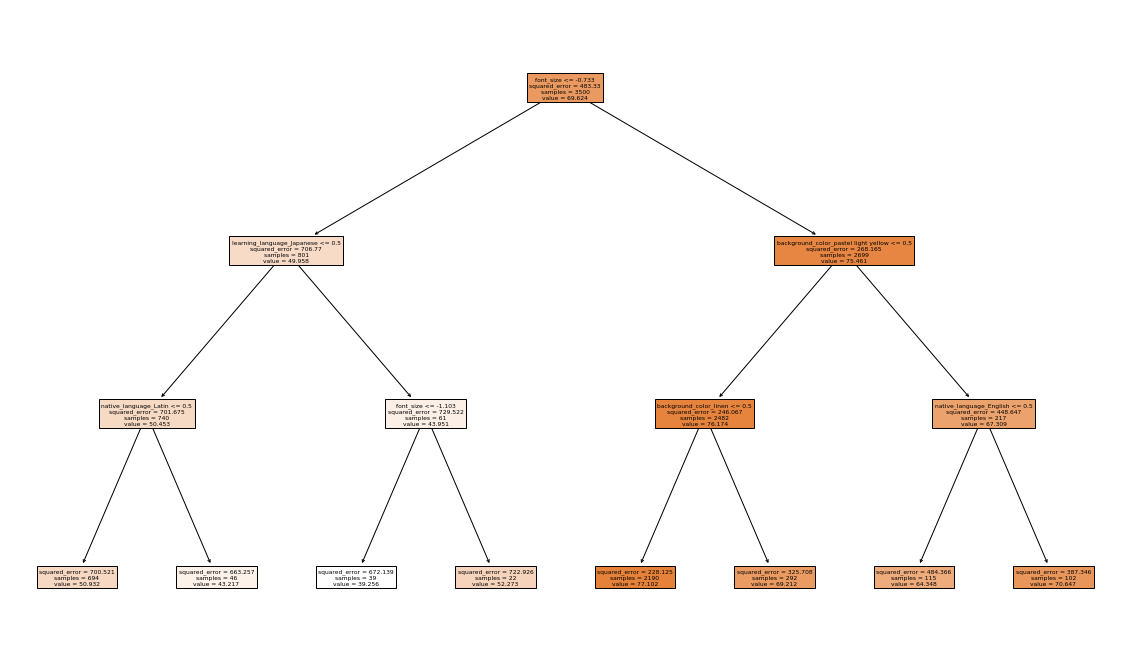

In [47]:
# Plot the decision tree
plt.figure(figsize=(20, 12))
tree.plot_tree(dt_model, feature_names = X_train_preprocessed.columns, filled = True)
plt.show()

In [48]:
feature_imp = {}
for fi, feature in zip(dt_model.feature_importances_, dt_model.feature_names_in_):
    feature_imp[feature] = fi

feature_imp

{'disability_id': 0.0,
 'font_size': 0.9123740454267515,
 'word_spacing': 0.0,
 'age': 0.0,
 'native_language_English': 0.00484234753752135,
 'native_language_French': 0.0,
 'native_language_German': 0.0,
 'native_language_Japanese': 0.0,
 'native_language_Latin': 0.0057967811465535505,
 'native_language_Russian': 0.0,
 'native_language_Spanish': 0.0,
 'learning_language_English': 0.0,
 'learning_language_French': 0.0,
 'learning_language_German': 0.0,
 'learning_language_Japanese': 0.00537835806060548,
 'learning_language_Latin': 0.0,
 'learning_language_Russian': 0.0,
 'learning_language_Spanish': 0.0,
 'setting_type_90000001B': 0.0,
 'setting_type_90000001C': 0.0,
 'setting_type_90000001D': 0.0,
 'setting_type_90000001E': 0.0,
 'setting_type_90000002A': 0.0,
 'setting_type_90000002B': 0.0,
 'setting_type_90000002C': 0.0,
 'setting_type_90000002D': 0.0,
 'setting_type_90000003A': 0.0,
 'setting_type_90000003B': 0.0,
 'setting_type_90000003C': 0.0,
 'setting_type_90000003D': 0.0,
 'fo

In [49]:
# Create a second instance of the DecisionTreeClassifier with less pruning
dt_model2 = DecisionTreeRegressor(max_depth = 4, random_state = 777)

# Train the model on the preprocessed training data
dt_model2.fit(X_train_preprocessed, y_train)

# Predict on the testing data
y_pred_dt2 = dt_model2.predict(X_test_preprocessed)

# Evaluate the model's performance using regression metrics
mse_dt2 = mean_squared_error(y_test, y_pred_dt2)
mae_dt2 = mean_absolute_error(y_test, y_pred_dt2)

print(f'Mean Squared Error: {mse_dt2}')
print(f'Mean Absolute Error: {mae_dt2}')

Mean Squared Error: 366.34185115407115
Mean Absolute Error: 15.278891635304864


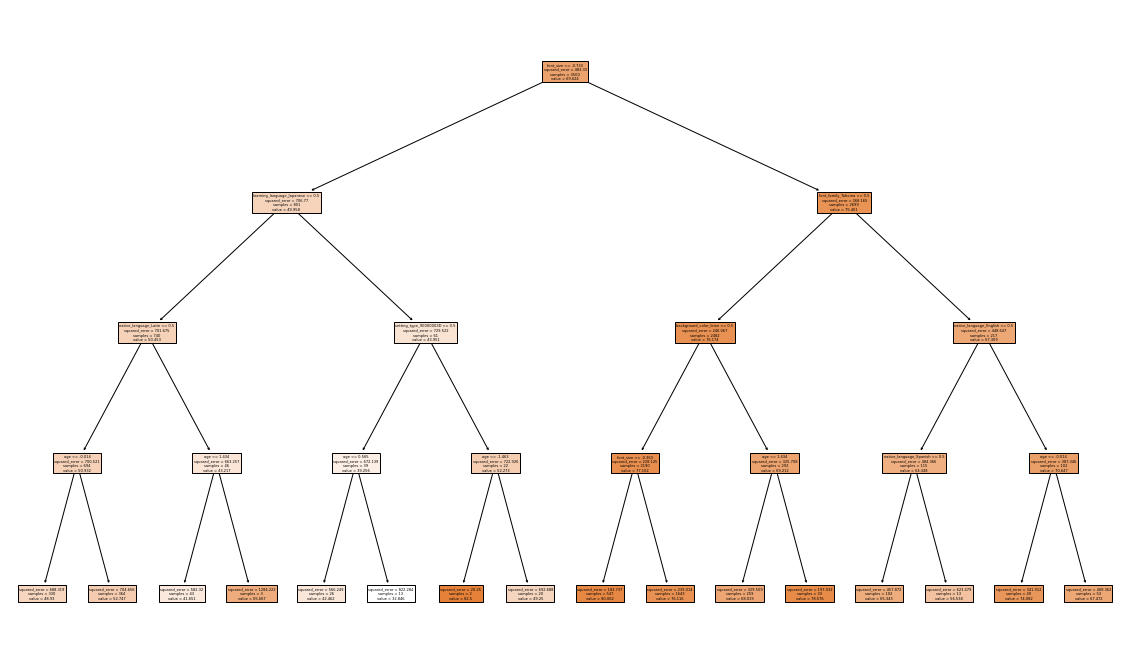

In [50]:
# Plot the decision tree
plt.figure(figsize=(20, 12))
tree.plot_tree(dt_model2, feature_names = X_train_preprocessed.columns, filled = True)
plt.show()

In [51]:
feature_imp2 = {}
for fi, feature in zip(dt_model2.feature_importances_, dt_model2.feature_names_in_):
    feature_imp2[feature] = fi

feature_imp2

{'disability_id': 0.0,
 'font_size': 0.8842713783521419,
 'word_spacing': 0.0,
 'age': 0.024535738635281176,
 'native_language_English': 0.004647124298954084,
 'native_language_French': 0.0,
 'native_language_German': 0.0,
 'native_language_Japanese': 0.0,
 'native_language_Latin': 0.005563079129107046,
 'native_language_Russian': 0.0,
 'native_language_Spanish': 0.0019366142173154065,
 'learning_language_English': 0.0,
 'learning_language_French': 0.0,
 'learning_language_German': 0.0,
 'learning_language_Japanese': 0.005161525115297465,
 'learning_language_Latin': 0.0,
 'learning_language_Russian': 0.0,
 'learning_language_Spanish': 0.0,
 'setting_type_90000001B': 0.0,
 'setting_type_90000001C': 0.0,
 'setting_type_90000001D': 0.0,
 'setting_type_90000001E': 0.0,
 'setting_type_90000002A': 0.0,
 'setting_type_90000002B': 0.0,
 'setting_type_90000002C': 0.0,
 'setting_type_90000002D': 0.0,
 'setting_type_90000003A': 0.0,
 'setting_type_90000003B': 0.0,
 'setting_type_90000003C': 0.0,


### MODEL 3: Apply a Linear Regression Model prior to Feature Selection

In [52]:
# Create an instance of the linear regression model
linreg_base_model = LinearRegression()

# Train the model on the preprocessed training data
linreg_base_model.fit(X_train_preprocessed, y_train)

# Predict on the testing data
y_pred_linreg_base = linreg_base_model.predict(X_test_preprocessed)

# Calculate the coefficient of determination of the prediction on the train data
r2_train_linreg_base = linreg_base_model.score(X_train_preprocessed, y_train)

# Evaluate the model's performance using regression metrics
mse_linreg_base = mean_squared_error(y_test, y_pred_linreg_base)
mae_linreg_base = mean_absolute_error(y_test, y_pred_linreg_base)
r2_test_linreg_base = r2_score(y_test, y_pred_linreg_base)

print(f'Coefficients: {linreg_base_model.coef_}\n')
print(f'Y-Intercept: {linreg_base_model.intercept_}\n')

print(f'Coefficient of Determination (R-Square), Train Data: {r2_train_linreg_base}')
print(f'Coefficient of Determination (R-Square), Test Data: {r2_test_linreg_base}\n')
print(f'Mean Squared Error: {mse_linreg_base}')
print(f'Mean Absolute Error: {mae_linreg_base}')

Coefficients: [ 1.77681497e+14  9.53197693e+13  7.41749789e+13  3.71093750e-01
  4.98029032e+13  3.51562500e-02 -2.77832031e-01  5.14038086e-01
 -1.93237305e+00 -1.50964355e+00 -6.42333984e-01  4.98029032e+13
  2.50970459e+00  8.79486084e-01  4.64523315e-01  3.19038391e+00
  2.78506088e+00  3.08294106e+00 -1.34433230e+13  3.72214343e+13
  2.88023124e+14  1.09433256e+14 -1.12869973e+13  5.39166481e+13
 -3.76086130e+14 -4.03705990e+12 -5.14961272e+13 -1.45953768e+14
 -2.11536209e+14 -2.51948327e+13 -9.43321688e+13 -8.06936845e+12
 -9.10890077e+13 -1.62208892e+13 -4.44665612e+14 -4.30639116e+13
 -9.47981346e+13 -1.33545893e+13  1.04128102e+14 -2.09321545e+13
 -1.16235127e+13  3.10085649e+13  2.65005084e+14 -2.12315792e+14
 -6.04429536e+13  1.07688883e+14  1.46656029e+13 -1.65107678e+14
 -1.14156867e+13  1.05255041e+14 -6.78531346e+13  1.17877416e+14
  1.44028719e+14 -1.28088744e+13 -8.98329750e+13 -2.74750025e+13
 -6.37081893e+13 -2.81755732e+12 -6.75186691e+13]

Y-Intercept: -55993236718

### MODEL 4: Apply a Lasso Regression Model prior to Feature Selection

In [53]:
# Create an instance of the Lasso regression model
lassoreg_base_model = Lasso(random_state = 777)

# Train the model on the preprocessed training data
lassoreg_base_model.fit(X_train_preprocessed, y_train)

# Predict on the testing data
y_pred_lassoreg_base = lassoreg_base_model.predict(X_test_preprocessed)

# Calculate the coefficient of determination of the prediction on the train data
r2_train_lassoreg_base = lassoreg_base_model.score(X_train_preprocessed, y_train)

# Evaluate the model's performance using regression metrics
mse_lassoreg_base = mean_squared_error(y_test, y_pred_lassoreg_base)
mae_lassoreg_base = mean_absolute_error(y_test, y_pred_lassoreg_base)
r2_test_lassoreg_base = r2_score(y_test, y_pred_lassoreg_base)

print(f'Coefficients: {lassoreg_base_model.coef_}\n')
print(f'Y-Intercept: {lassoreg_base_model.intercept_}\n')

print(f'Coefficient of Determination (R-Square), Train Data: {r2_train_lassoreg_base}')
print(f'Coefficient of Determination (R-Square), Test Data: {r2_test_lassoreg_base}\n')
print(f'Mean Squared Error: {mse_lassoreg_base}')
print(f'Mean Absolute Error: {mae_lassoreg_base}')

Coefficients: [-2.25552034e+00  5.32004625e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  2.46885343e+00
  0.00000000e+00 -2.02609239e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  1.95933023e-01
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  1.92542408e-02  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  1.77879378e-03 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00]

Y-Intercept: 69.555257757

### MODEL 5: Apply a Ridge Regression Model prior to Feature Selection

In [54]:
# Create an instance of the Ridge regression model
ridgereg_base_model = Ridge(random_state = 777)

# Train the model on the preprocessed training data
ridgereg_base_model.fit(X_train_preprocessed, y_train)

# Predict on the testing data
y_pred_ridgereg_base = ridgereg_base_model.predict(X_test_preprocessed)

# Calculate the coefficient of determination of the prediction on the train data
r2_train_ridgereg_base = ridgereg_base_model.score(X_train_preprocessed, y_train)

# Evaluate the model's performance using regression metrics
mse_ridgereg_base = mean_squared_error(y_test, y_pred_ridgereg_base)
mae_ridgereg_base = mean_absolute_error(y_test, y_pred_ridgereg_base)
r2_test_ridgereg_base = r2_score(y_test, y_pred_ridgereg_base)

print(f'Coefficients: {ridgereg_base_model.coef_}\n')
print(f'Y-Intercept: {ridgereg_base_model.intercept_}\n')

print(f'Coefficient of Determination (R-Square), Train Data: {r2_train_ridgereg_base}')
print(f'Coefficient of Determination (R-Square), Test Data: {r2_test_ridgereg_base}\n')
print(f'Mean Squared Error: {mse_ridgereg_base}')
print(f'Mean Absolute Error: {mae_ridgereg_base}')

Coefficients: [-2.60658408  5.13693968  0.50216338  0.33618139 -0.79201667  0.07417719
  0.00656594  0.49603193 -1.91106618 -1.46422858 -0.31438838  0.79201667
  2.49437781  0.96823873  0.57765738  3.19698782  2.96004336  3.05727609
 -1.48006198  2.86486698  0.55332505 -4.54019231  3.3938861   3.632574
  3.51012722 -4.18282477  1.9078901   1.67425822 -4.35368156 -3.46869508
 -0.35502629  3.3938861  -3.46869508 -1.48006198  0.55332505  3.632574
  1.9078901   2.86486698 -4.54019231 -4.18282477  3.632574    2.86486698
  4.06345227 -4.35368156 -4.18282477  0.48852804 -1.48006198  1.67425822
  1.9078901  -4.54019231 -3.46869508 -1.9078901  -0.67269755  3.632574
 -0.59298117  1.9078901   1.67425822 -1.48006198  0.48852804]

Y-Intercept: 70.28878520787839

Coefficient of Determination (R-Square), Train Data: 0.26382548103452397
Coefficient of Determination (R-Square), Test Data: 0.2576470419107021

Mean Squared Error: 361.7153931736747
Mean Absolute Error: 15.226113554362557


### MODEL 6: Apply an ElasticNet Regression Model prior to Feature Selection

In [55]:
# Create an instance of the ElasticNet regression model
elasticnetreg_base_model = ElasticNet(random_state = 777)

# Train the model on the preprocessed training data
elasticnetreg_base_model.fit(X_train_preprocessed, y_train)

# Predict on the testing data
y_pred_elasticnetreg_base = elasticnetreg_base_model.predict(X_test_preprocessed)

# Calculate the coefficient of determination of the prediction on the train data
r2_train_elasticnetreg_base = elasticnetreg_base_model.score(X_train_preprocessed, y_train)

# Evaluate the model's performance using regression metrics
mse_elasticnetreg_base = mean_squared_error(y_test, y_pred_elasticnetreg_base)
mae_elasticnetreg_base = mean_absolute_error(y_test, y_pred_elasticnetreg_base)
r2_test_elasticnetreg_base = r2_score(y_test, y_pred_elasticnetreg_base)

print(f'Coefficients: {elasticnetreg_base_model.coef_}\n')
print(f'Y-Intercept: {elasticnetreg_base_model.intercept_}\n')

print(f'Coefficient of Determination (R-Square), Train Data: {r2_train_elasticnetreg_base}')
print(f'Coefficient of Determination (R-Square), Test Data: {r2_test_elasticnetreg_base}\n')
print(f'Mean Squared Error: {mse_elasticnetreg_base}')
print(f'Mean Absolute Error: {mae_elasticnetreg_base}')

Coefficients: [-0.66354464  3.14965646  0.72369299  0.          0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
  0.         -0.         -0.          0.          0.          0.
 -0.          0.12958458  0.         -0.63034707  0.          0.76648162
  0.         -1.14889166  0.10243547  0.         -0.15687581 -1.06006426
  0.          0.         -1.06006655 -0.          0.          0.76648273
  0.10243512  0.12958604 -0.63034524 -1.14889108  0.76648317  0.1295872
  0.59328389 -0.15687909 -1.14889116  0.         -0.          0.
  0.10243323 -0.63034346 -1.06007055 -0.10243141 -0.21325727  0.76648414
  0.          0.102428    0.         -0.          0.        ]

Y-Intercept: 70.02694942465402

Coefficient of Determination (R-Square), Train Data: 0.11860184710985977
Coefficient of Determination (R-Square), Test Data: 0.12059572772934479

Mean Squared Error: 428.4943686648929
Mean Absolute Error: 16.616322581321477
